### Importing Necessary Libraries

In [1]:
import warnings 
warnings.filterwarnings("ignore")

import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

#### Reading the datasets

In [2]:
app = pd.read_csv("application_data.csv")
pre_app  = pd.read_csv("previous_application.csv")

#### getting information about the datasets

In [3]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
pre_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [6]:
app.shape

(307511, 122)

In [7]:
pre_app.shape

(1670214, 37)

#### Approach

We have two datasets and **SK_ID_CURR** is a common dataset. Also *pre_app* have more rows than *app*. So
its better to analyse the ID's which are in application_data.csv 

In [8]:
pre_app['NEW'] = app.SK_ID_CURR
pre_app['TARGET'] = app.TARGET

pre_app = pre_app[~pre_app.NEW.isnull()].copy()


pre_app.drop(['NEW'],inplace=True,axis=1)
pre_app.shape

(307511, 38)

#### Data Cleaning on Previsous Application Dataset

In [9]:
pre_app.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                     66847
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_DOWN_PAYMENT               159975
AMT_GOODS_PRICE                 68968
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              159975
RATE_INTEREST_PRIMARY          306399
RATE_INTEREST_PRIVILEGED       306399
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                150351
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_

#### Calculating imbalance in the dataset

In [10]:
pre_app.TARGET.value_counts(normalize=True) *100

0.0    91.927118
1.0     8.072882
Name: TARGET, dtype: float64

<AxesSubplot:ylabel='TARGET'>

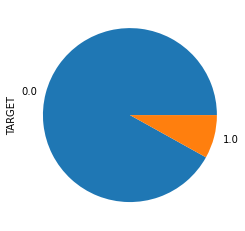

In [11]:
(pre_app.TARGET.value_counts(normalize=True) *100).plot.pie()

<AxesSubplot:>

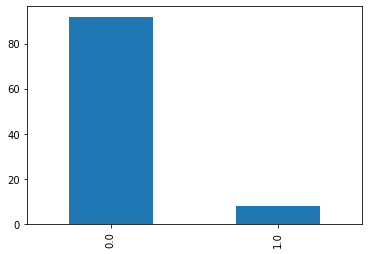

In [12]:
(pre_app.TARGET.value_counts(normalize=True) *100).plot.bar()

##### Solution:

The data is highly imbalanced. Our targeted values are nearly too less. So it is very important to analyse every column and every row. Dropping single row may affect our analysis hugely.

##### Calculating missing value percentage

In [13]:
pre_app.isnull().sum()/pre_app.shape[0] * 100 

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    21.738084
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               52.022529
AMT_GOODS_PRICE                22.427816
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              52.022529
RATE_INTEREST_PRIMARY          99.638387
RATE_INTEREST_PRIVILEGED       99.638387
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                48.892885
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

##### Seperating out the values based on TARGET column and checking null values in DEFAULTERS and NON-DEFAULTERS values.

In [14]:
pre_app1 = pre_app[pre_app.TARGET == 1] #people who have payment difficulties
pre_app0 = pre_app[pre_app.TARGET == 0] #people without payment difficuties

In [15]:
pre_app0.isnull().sum()/pre_app0.shape[0] * 100 

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    21.764431
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               51.982765
AMT_GOODS_PRICE                22.439739
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              51.982765
RATE_INTEREST_PRIMARY          99.641652
RATE_INTEREST_PRIVILEGED       99.641652
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                48.884982
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [16]:
pre_app1.isnull().sum()/pre_app1.shape[0] * 100 

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    21.438066
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               52.475327
AMT_GOODS_PRICE                22.292044
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              52.475327
RATE_INTEREST_PRIMARY          99.601208
RATE_INTEREST_PRIVILEGED       99.601208
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                48.982880
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

##### Removing columns which have more than 20% of missing value. (Mainly removing numerical columns)

In [17]:
pre_app.drop(['AMT_ANNUITY','AMT_DOWN_PAYMENT','AMT_GOODS_PRICE','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY',
              'RATE_INTEREST_PRIVILEGED','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION',
             'DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL','CNT_PAYMENT'],inplace=True,axis=1)

In [18]:
pre_app.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_APPLICATION                     0
AMT_CREDIT                          0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                150351
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION                55
TARGET                              0
dtype: int64

In [19]:
pre_app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      92804
Family             40272
Spouse, partner    12548
Children            6036
Other_B             3375
Other_A             1716
Group of people      409
Name: NAME_TYPE_SUITE, dtype: int64

In [20]:
#value calculating in percentage
pre_app.NAME_TYPE_SUITE.isnull().sum()/pre_app.shape[0]

0.4889288513256436

<AxesSubplot:>

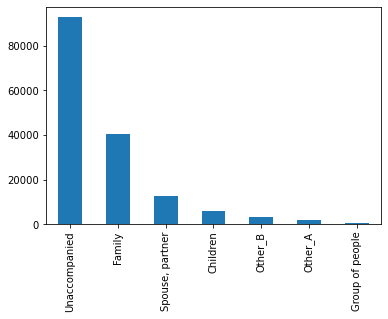

In [21]:
pre_app.NAME_TYPE_SUITE.value_counts().plot.bar()

#### Deal with NAME_TYPE_SUITE

This column means **Who accompanied client when applying for the previous application** . So there maybe a chance to find clints with payment difficulties are based on any particular category. But nearly 48.8% percentage values are missing. 

So even adding those missing values as **Unaccompained**, There maybe a chance that it may create a misunderstanding in the data. So it's better to create a new category in this particular column and putting all the null values there and doing the analysis.


In [22]:
pre_app['NAME_TYPE_SUITE'].fillna("Missing_Values", inplace= True)
pre_app['NAME_TYPE_SUITE'].isnull().sum()

0

<AxesSubplot:>

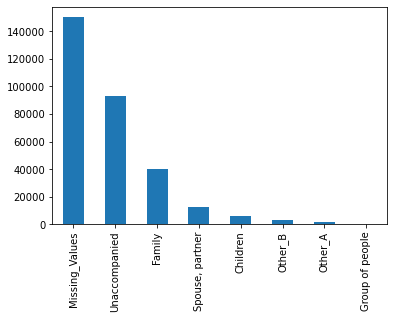

In [23]:
pre_app.NAME_TYPE_SUITE.value_counts().plot.bar()

In [24]:
pre_app1 = pre_app[pre_app.TARGET == 1] #people who have payment difficulties
pre_app0 = pre_app[pre_app.TARGET == 0] #people without payment difficuties

<AxesSubplot:>

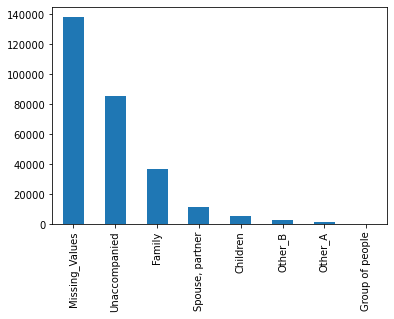

In [25]:
pre_app0.NAME_TYPE_SUITE.value_counts().plot.bar()

<AxesSubplot:>

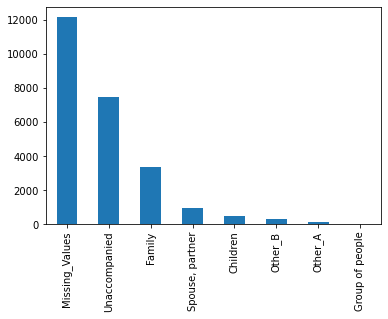

In [26]:
pre_app1.NAME_TYPE_SUITE.value_counts().plot.bar()

#### Output:
Unfortunately we didn't get any special reason.

In [27]:
pre_app.PRODUCT_COMBINATION.value_counts()

Cash                              50990
POS household with interest       50589
POS mobile with interest          42248
Cash X-Sell: middle               25489
Cash X-Sell: low                  22909
Card Street                       20600
POS industry with interest        18868
POS household without interest    15742
Card X-Sell                       14602
Cash Street: high                 10701
Cash X-Sell: high                 10488
Cash Street: middle                6253
Cash Street: low                   6064
POS other with interest            4522
POS mobile without interest        4511
POS industry without interest      2372
POS others without interest         508
Name: PRODUCT_COMBINATION, dtype: int64

<AxesSubplot:>

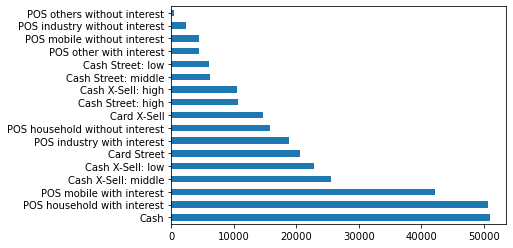

In [28]:
pre_app.PRODUCT_COMBINATION.value_counts().plot.barh()

In [29]:
pre_app.PRODUCT_COMBINATION.isnull().sum()

55

In [30]:
pre_app.PRODUCT_COMBINATION.isnull().sum()/pre_app.shape[0]   *100

0.017885539053887504

##### Solution:

So nearly PRODUCT_COMBINATION having 0.017% percentage of missing values. Adding this values into the highest category in this column won't make any particular change.

In [31]:
pre_app['PRODUCT_COMBINATION'].fillna("Cash", inplace= True)
pre_app['PRODUCT_COMBINATION'].isnull().sum()

0

In [32]:
pre_app.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
TARGET                         0
dtype: int64

In [33]:
pre_app.drop(['SK_ID_PREV'],inplace=True,axis=1)

In [34]:
pre_app1 = pre_app[pre_app.TARGET == 1] #people who have payment difficulties
pre_app0 = pre_app[pre_app.TARGET == 0] #people without payment difficuties

##### Univariate Analysis

In [35]:
pre_app.dtypes

SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_APPLICATION                float64
AMT_CREDIT                     float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
NAME_YIELD_GROUP                object
PRODUCT_COMBINATION             object
TARGET                         float64
dtype: object

###### Categorical Features Analysis

In [36]:
#fig,ax = plt.subplots(ncols=3, nrows=1)

In [37]:
categorical_columns = []
for i in pre_app.columns:
    if pre_app[i].dtype == object:
        categorical_columns.append(i)

categorical_column = pd.DataFrame()

for i in categorical_columns:
    categorical_column[i] = pre_app[i]
    
categorical_column.columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [38]:
pre_app.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Consumer loans     0.453187
Cash loans         0.432160
Revolving loans    0.114474
XNA                0.000179
Name: NAME_CONTRACT_TYPE, dtype: float64

In [39]:
pre_app.loc[pre_app.NAME_CONTRACT_TYPE == "XNA", "NAME_CONTRACT_TYPE"]= "Consumer loans"

In [40]:
pre_app.NAME_CONTRACT_TYPE.value_counts()

Consumer loans     139415
Cash loans         132894
Revolving loans     35202
Name: NAME_CONTRACT_TYPE, dtype: int64

In [41]:
pre_app1 = pre_app[pre_app.TARGET == 1] #people who have payment difficulties
pre_app0 = pre_app[pre_app.TARGET == 0] #people without payment difficuties

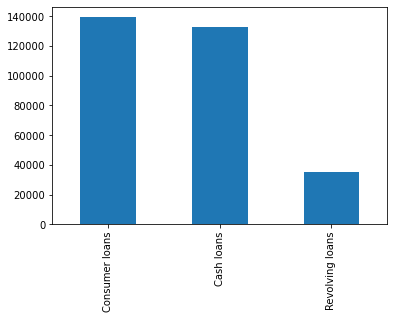

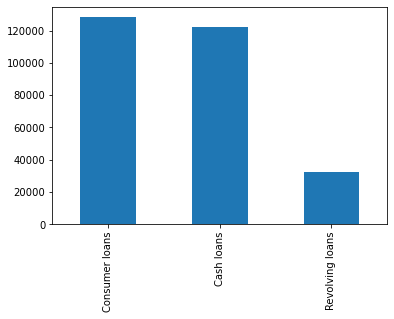

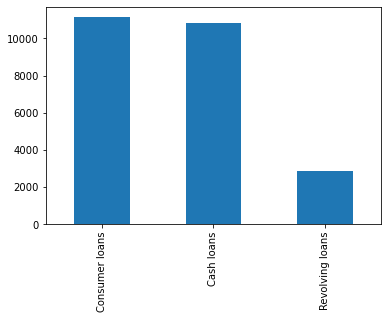

In [42]:
pre_app.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.show()
pre_app0.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.show()
pre_app1.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.show()

In [43]:
pre_app.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True)

WEDNESDAY    0.153126
TUESDAY      0.152317
MONDAY       0.150902
FRIDAY       0.150229
THURSDAY     0.148769
SATURDAY     0.144792
SUNDAY       0.099866
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

In [44]:
pre_app0.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True)

WEDNESDAY    0.153386
TUESDAY      0.152314
MONDAY       0.150595
FRIDAY       0.149664
THURSDAY     0.148791
SATURDAY     0.145058
SUNDAY       0.100192
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

In [45]:
pre_app1.WEEKDAY_APPR_PROCESS_START.value_counts(normalize=True)

FRIDAY       0.156657
MONDAY       0.154401
TUESDAY      0.152346
WEDNESDAY    0.150171
THURSDAY     0.148520
SATURDAY     0.141752
SUNDAY       0.096153
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64

#### conc:

From here we got to know that, those people who have difficult in payments, maximum they started the application process on FRIDAY. (Lol)

In [46]:
pre_app.FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize=True)

Y    0.994875
N    0.005125
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

In [47]:
print(pre_app0.FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize=True))

print(pre_app1.FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize=True))

Y    0.994902
N    0.005098
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64
Y    0.994562
N    0.005438
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64


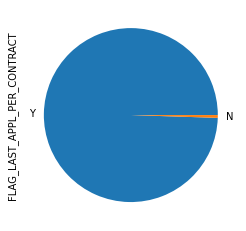

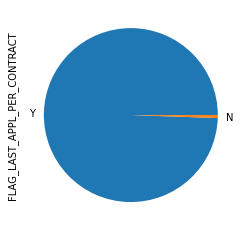

In [48]:
pre_app0.FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize=True).plot.pie()
plt.show()
pre_app1.FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize=True).plot.pie()
plt.show()

##### Conc:
Nothing specially found.

In [49]:
pre_app.NAME_CASH_LOAN_PURPOSE.unique()

array(['XAP', 'XNA', 'Repairs', 'Everyday expenses', 'Car repairs',
       'Building a house or an annex', 'Other', 'Journey',
       'Purchase of electronic equipment', 'Medicine',
       'Payments on other loans', 'Urgent needs', 'Buying a used car',
       'Buying a new car', 'Buying a holiday home / land', 'Education',
       'Buying a home', 'Furniture', 'Buying a garage',
       'Business development', 'Wedding / gift / holiday', 'Hobby',
       'Gasification / water supply', 'Refusal to name the goal',
       'Money for a third person'], dtype=object)

#### Unknown Categories:

XNA and XAP

In [50]:
pre_app.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)

XAP                                 0.567840
XNA                                 0.391667
Repairs                             0.013817
Other                               0.008949
Urgent needs                        0.004995
Buying a used car                   0.001711
Building a house or an annex        0.001567
Everyday expenses                   0.001421
Medicine                            0.001265
Payments on other loans             0.001096
Education                           0.000904
Journey                             0.000660
Buying a new car                    0.000637
Purchase of electronic equipment    0.000563
Wedding / gift / holiday            0.000556
Car repairs                         0.000494
Furniture                           0.000491
Buying a home                       0.000478
Buying a holiday home / land        0.000374
Business development                0.000202
Gasification / water supply         0.000182
Buying a garage                     0.000065
Hobby     

<AxesSubplot:>

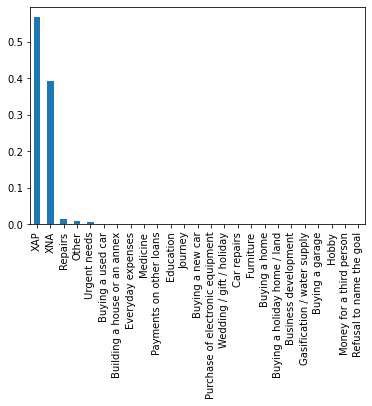

In [51]:
pre_app.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True).plot.bar()

In [52]:
pre_app1.NAME_CASH_LOAN_PURPOSE.value_counts(normalize=True)

XAP                                 0.563102
XNA                                 0.394280
Repairs                             0.015710
Other                               0.009507
Urgent needs                        0.004471
Buying a used car                   0.001853
Building a house or an annex        0.001531
Medicine                            0.001490
Everyday expenses                   0.001450
Payments on other loans             0.001249
Education                           0.000967
Wedding / gift / holiday            0.000886
Journey                             0.000645
Buying a home                       0.000564
Buying a new car                    0.000443
Car repairs                         0.000363
Buying a holiday home / land        0.000322
Furniture                           0.000282
Purchase of electronic equipment    0.000282
Gasification / water supply         0.000242
Buying a garage                     0.000161
Business development                0.000081
Money for 

###### Conc:
    Nearly XAP and XNA had more than 90% values. But inorder to find a reason for defauters lets keep the column.

In [53]:
pre_app.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

#### Bivariate Analysis

In [54]:
pre_app.groupby('NAME_CONTRACT_STATUS')['NAME_CASH_LOAN_PURPOSE'].value_counts(normalize=True)

NAME_CONTRACT_STATUS  NAME_CASH_LOAN_PURPOSE          
Approved              XAP                                 0.711922
                      XNA                                 0.263722
                      Repairs                             0.007822
                      Other                               0.005911
                      Urgent needs                        0.003333
                                                            ...   
Unused offer          Everyday expenses                   0.000793
                      Medicine                            0.000595
                      Purchase of electronic equipment    0.000397
                      Buying a new car                    0.000198
                      Buying a used car                   0.000198
Name: NAME_CASH_LOAN_PURPOSE, Length: 79, dtype: float64

#Conc:
XNA and XAP are in Approved category. So by doing bivariate analysis, we may get the proper output.

#### Multivariate Analysis

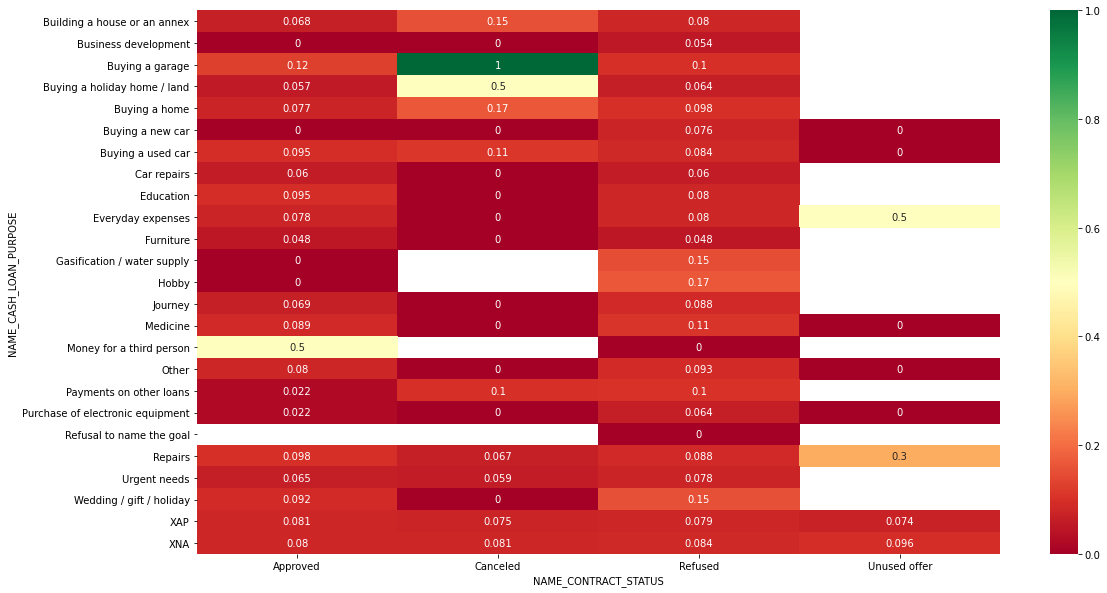

In [55]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=pre_app, index="NAME_CASH_LOAN_PURPOSE", columns="NAME_CONTRACT_STATUS", values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

**Approved:** The Company has approved loan Application

**Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.

**Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).

**Unused offer:**  Loan has been cancelled by the client but at different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

##### Conc:
     So from the above multivariate analysis, we got to know that if the clinet cancelled the application while applying buying a garage, he had difficult in payment. Which means this category people became defaulters.

In [56]:
pre_app.NAME_PAYMENT_TYPE.value_counts()

Cash through the bank                        192812
XNA                                          112884
Non-cash from your account                     1609
Cashless from the account of the employer       206
Name: NAME_PAYMENT_TYPE, dtype: int64

In [57]:
pre_app1.NAME_PAYMENT_TYPE.value_counts()/pre_app1.shape[0]

Cash through the bank                        0.624733
XNA                                          0.369184
Non-cash from your account                   0.005277
Cashless from the account of the employer    0.000806
Name: NAME_PAYMENT_TYPE, dtype: float64

In [58]:
pre_app0.NAME_PAYMENT_TYPE.value_counts()/pre_app0.shape[0]

Cash through the bank                        0.627208
XNA                                          0.366905
Non-cash from your account                   0.005228
Cashless from the account of the employer    0.000658
Name: NAME_PAYMENT_TYPE, dtype: float64

###### Conc:
We didn't get any important details from the columns named **NAME_CONTRACT_TYPE,FLAG_LAST_APPL_PER_CONTRACT,NAME_PAYMENT_TYPE**. So it's better we can drop those columns and do the further analysis.

In [59]:
pre_app.drop(['NAME_CONTRACT_TYPE','FLAG_LAST_APPL_PER_CONTRACT','NAME_PAYMENT_TYPE'],inplace=True,axis=1)

In [60]:
pre_app.CODE_REJECT_REASON.unique()

array(['XAP', 'HC', 'LIMIT', 'CLIENT', 'SCOFR', 'SCO', 'XNA', 'VERIF',
       'SYSTEM'], dtype=object)

<AxesSubplot:>

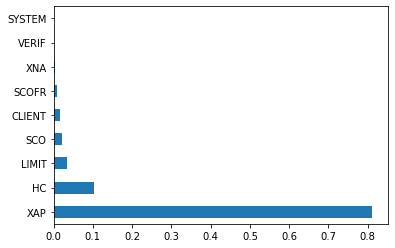

In [61]:
pre_app.CODE_REJECT_REASON.value_counts(normalize=True).plot.barh()

<AxesSubplot:>

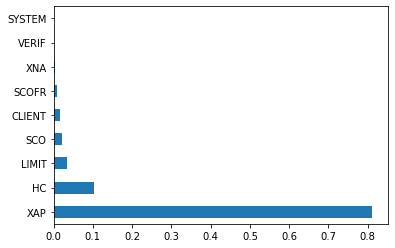

In [62]:
pre_app0.CODE_REJECT_REASON.value_counts(normalize=True).plot.barh()

<AxesSubplot:>

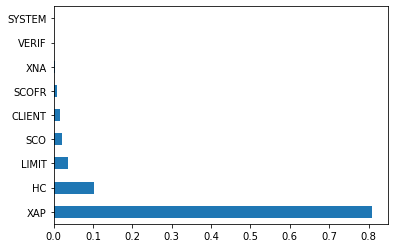

In [63]:
pre_app1.CODE_REJECT_REASON.value_counts(normalize=True).plot.barh()

In [64]:
pre_app.columns

Index(['SK_ID_CURR', 'AMT_APPLICATION', 'AMT_CREDIT',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'TARGET'],
      dtype='object')

In [65]:
categorical_column.columns

Index(['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [66]:
pre_app.NAME_TYPE_SUITE.value_counts(normalize=True)

Missing_Values     0.488929
Unaccompanied      0.301791
Family             0.130961
Spouse, partner    0.040805
Children           0.019629
Other_B            0.010975
Other_A            0.005580
Group of people    0.001330
Name: NAME_TYPE_SUITE, dtype: float64

In [67]:
pre_app1.NAME_TYPE_SUITE.value_counts(normalize=True)

Missing_Values     0.489829
Unaccompanied      0.300624
Family             0.134864
Spouse, partner    0.038671
Children           0.018288
Other_B            0.011480
Other_A            0.005116
Group of people    0.001128
Name: NAME_TYPE_SUITE, dtype: float64

In [68]:
pre_app.NAME_CLIENT_TYPE.value_counts(normalize=True)

Repeater     0.731574
New          0.185554
Refreshed    0.081708
XNA          0.001164
Name: NAME_CLIENT_TYPE, dtype: float64

#### Dropping columns idea:

After reading the columns description and risk analysis course, I thing its better to drop these columns and do the analysis.

In [69]:
#Removing unwanted object columns:
pre_app.drop(['NAME_CLIENT_TYPE','NAME_PORTFOLIO','NAME_YIELD_GROUP'],inplace=True,axis=1)

#### Conclusion of univariate analysis:

So by doing univariate alone won't make a big differece. Even at some cases bivariate fails. So we just focus on multivariate analysis.

In [70]:
pre_app.dtypes

SK_ID_CURR                      int64
AMT_APPLICATION               float64
AMT_CREDIT                    float64
WEEKDAY_APPR_PROCESS_START     object
HOUR_APPR_PROCESS_START         int64
NFLAG_LAST_APPL_IN_DAY          int64
NAME_CASH_LOAN_PURPOSE         object
NAME_CONTRACT_STATUS           object
DAYS_DECISION                   int64
CODE_REJECT_REASON             object
NAME_TYPE_SUITE                object
NAME_GOODS_CATEGORY            object
NAME_PRODUCT_TYPE              object
CHANNEL_TYPE                   object
SELLERPLACE_AREA                int64
NAME_SELLER_INDUSTRY           object
PRODUCT_COMBINATION            object
TARGET                        float64
dtype: object

### Bivariate and Multivariate Analysis

In [71]:
pre_app1 = pre_app[pre_app.TARGET == 1] #people who have payment difficulties
pre_app0 = pre_app[pre_app.TARGET == 0] #people without payment difficuties

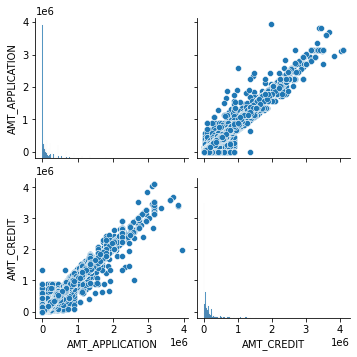

In [72]:
sns.pairplot(data= pre_app, vars= ['AMT_APPLICATION','AMT_CREDIT'])
plt.show()

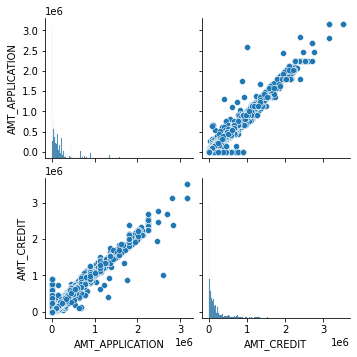

In [73]:
sns.pairplot(data= pre_app1, vars= ['AMT_APPLICATION','AMT_CREDIT'])
plt.show()

##### Conc:
We can see that AMT_APPLICATION and AMT_CREDIT is too closely corelated to each other.

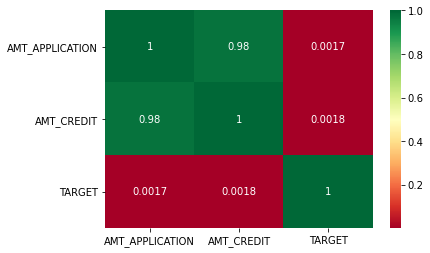

In [74]:
sns.heatmap(pre_app[["AMT_APPLICATION", "AMT_CREDIT", "TARGET"]].corr(), annot= True, cmap= "RdYlGn",center=0.5)
plt.show()

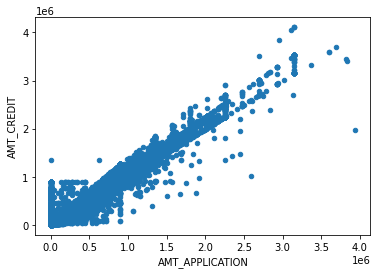

In [75]:
pre_app.plot.scatter(x= "AMT_APPLICATION", y= "AMT_CREDIT")
plt.show()

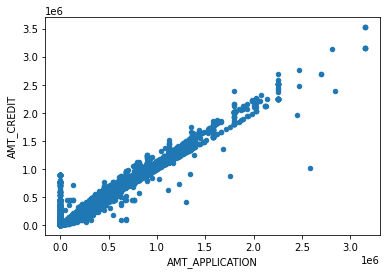

In [76]:
pre_app1.plot.scatter(x= "AMT_APPLICATION", y= "AMT_CREDIT")
plt.show()

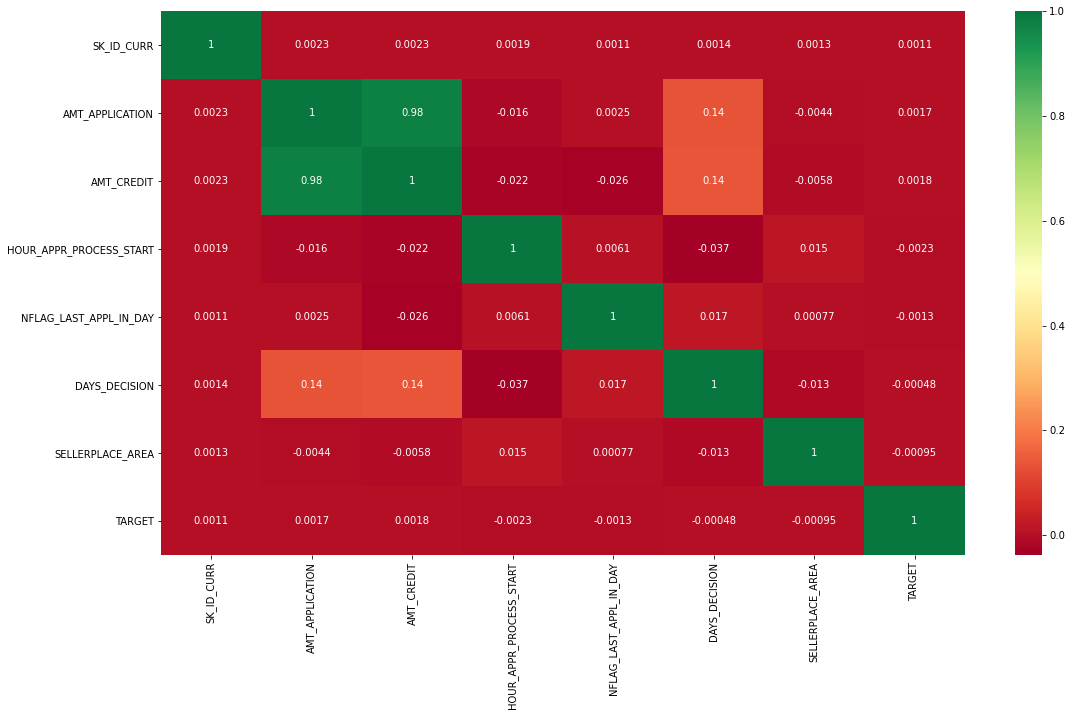

In [77]:
plt.figure(figsize=(18,10))
sns.heatmap(pre_app.corr(), annot= True, cmap= "RdYlGn",center=0.5)
plt.show()

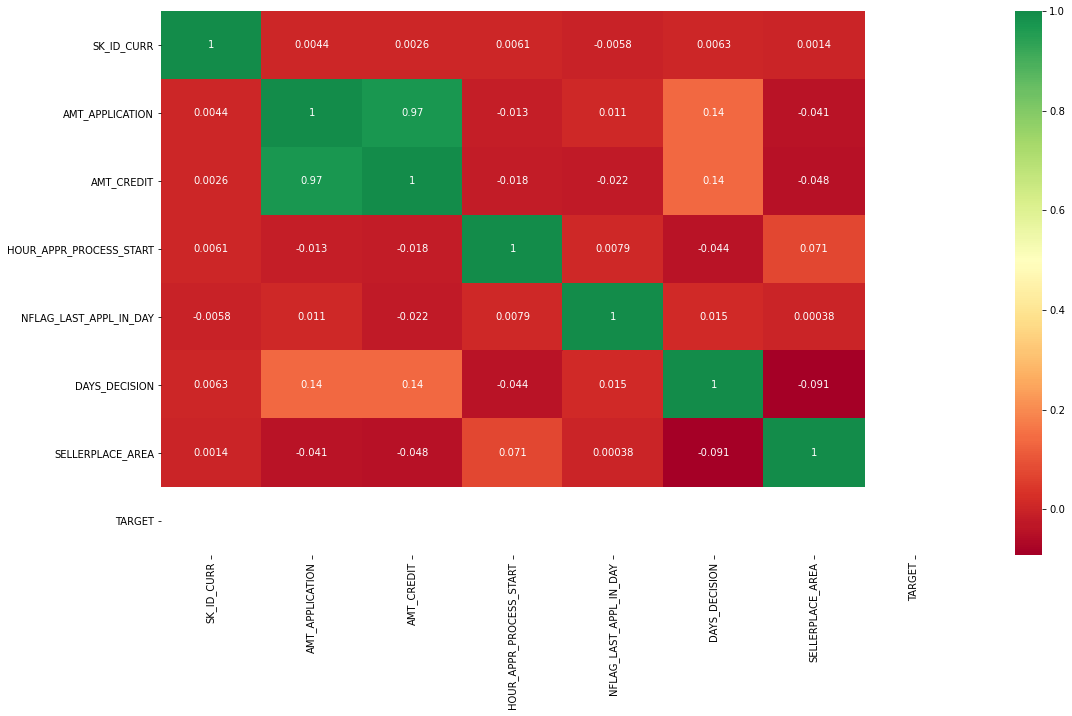

In [78]:
plt.figure(figsize=(18,10))
sns.heatmap(pre_app1.corr(), annot= True, cmap= "RdYlGn",center=0.5)
plt.show()

##### Conc:

So no numerical values have corelated with any ohter thing, except AMT_CREDIT and AMT_APPLICATION. 

##### Multivariate analysis

In [79]:
pre_app.dtypes

SK_ID_CURR                      int64
AMT_APPLICATION               float64
AMT_CREDIT                    float64
WEEKDAY_APPR_PROCESS_START     object
HOUR_APPR_PROCESS_START         int64
NFLAG_LAST_APPL_IN_DAY          int64
NAME_CASH_LOAN_PURPOSE         object
NAME_CONTRACT_STATUS           object
DAYS_DECISION                   int64
CODE_REJECT_REASON             object
NAME_TYPE_SUITE                object
NAME_GOODS_CATEGORY            object
NAME_PRODUCT_TYPE              object
CHANNEL_TYPE                   object
SELLERPLACE_AREA                int64
NAME_SELLER_INDUSTRY           object
PRODUCT_COMBINATION            object
TARGET                        float64
dtype: object

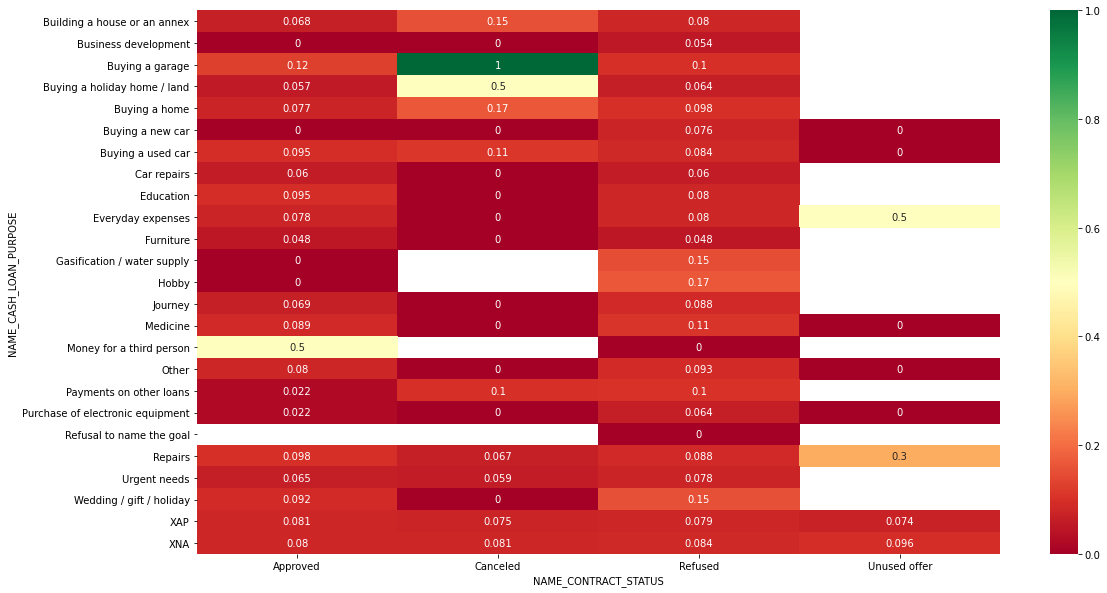

In [80]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=pre_app, index="NAME_CASH_LOAN_PURPOSE", columns="NAME_CONTRACT_STATUS", values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

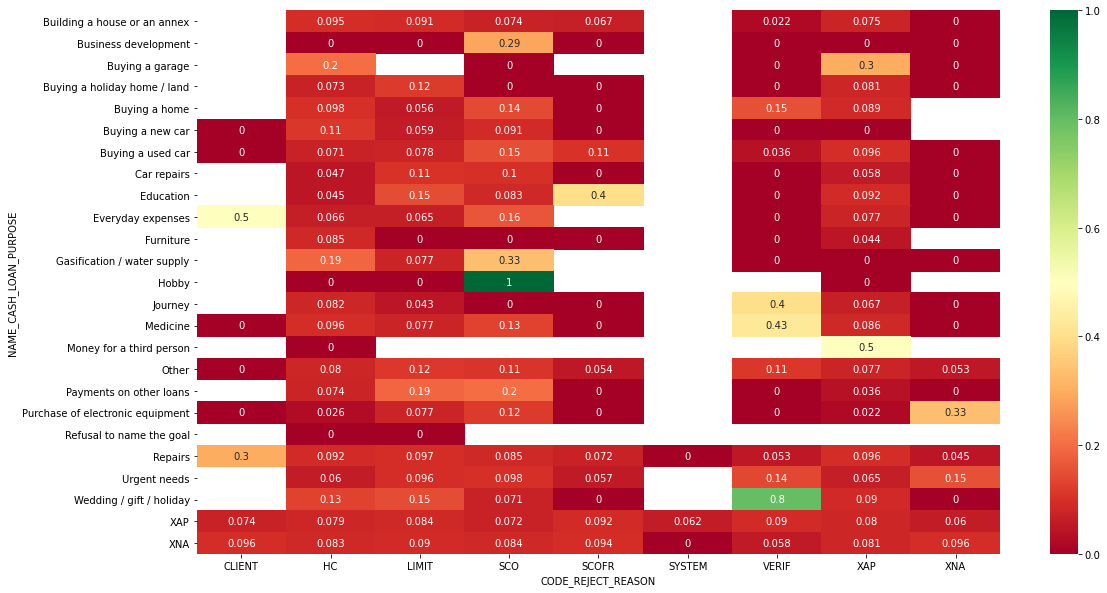

In [81]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=pre_app, index="NAME_CASH_LOAN_PURPOSE", columns="CODE_REJECT_REASON", values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

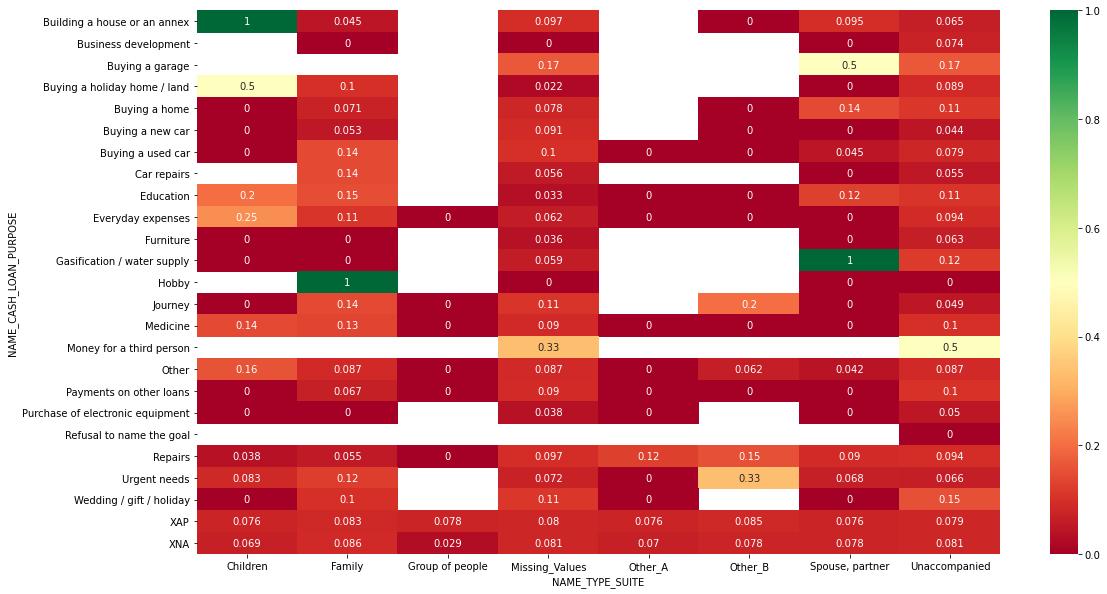

In [82]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=pre_app, index="NAME_CASH_LOAN_PURPOSE", columns="NAME_TYPE_SUITE", values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

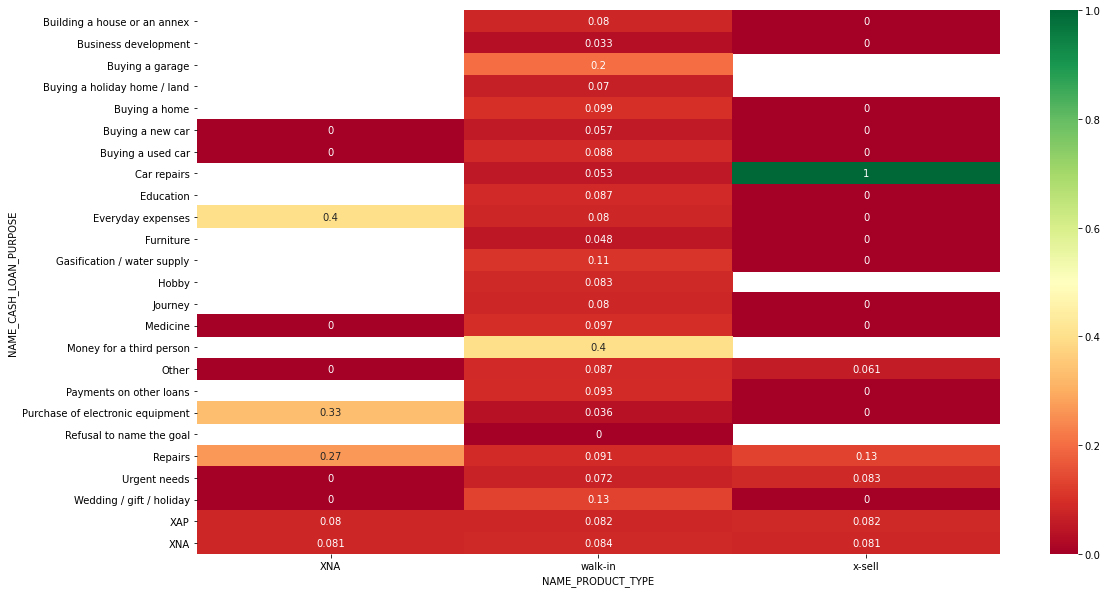

In [83]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=pre_app, index="NAME_CASH_LOAN_PURPOSE", columns="NAME_PRODUCT_TYPE", values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

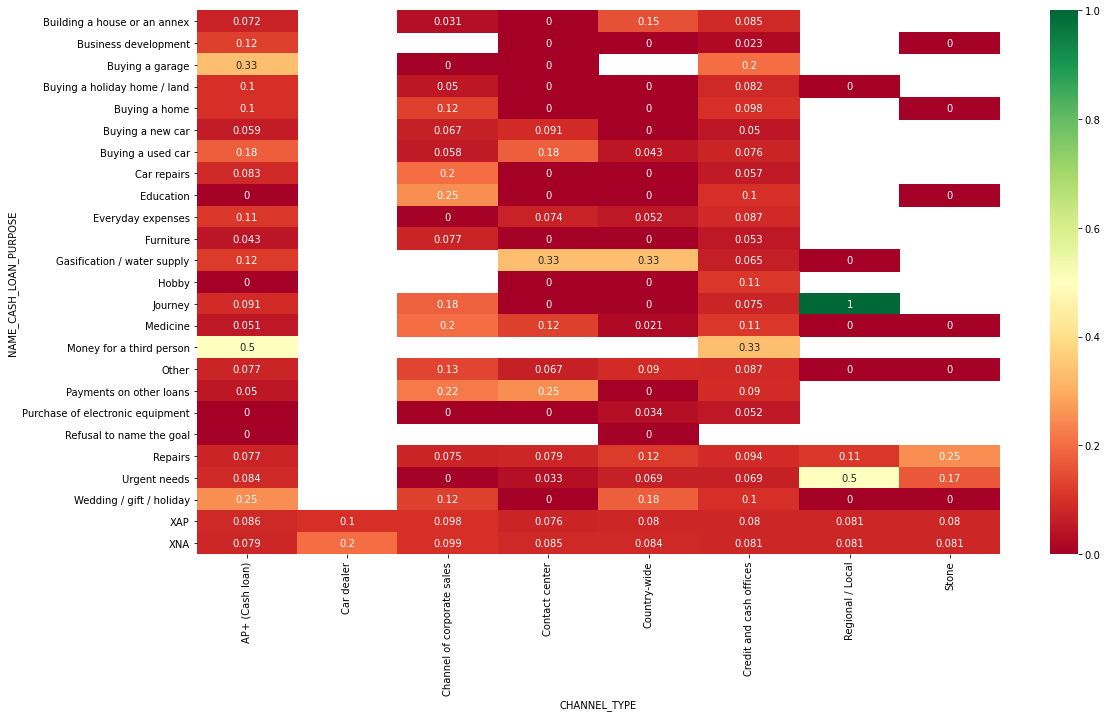

In [84]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=pre_app, index="NAME_CASH_LOAN_PURPOSE", columns="CHANNEL_TYPE", values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

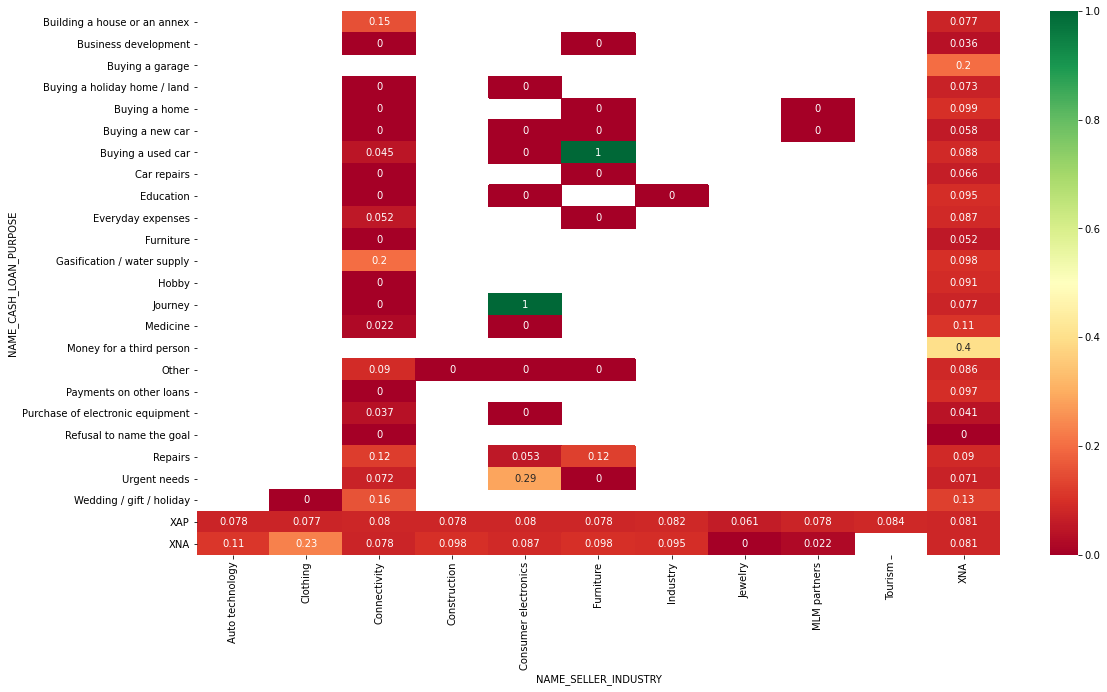

In [85]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=pre_app, index="NAME_CASH_LOAN_PURPOSE", columns="NAME_SELLER_INDUSTRY", values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

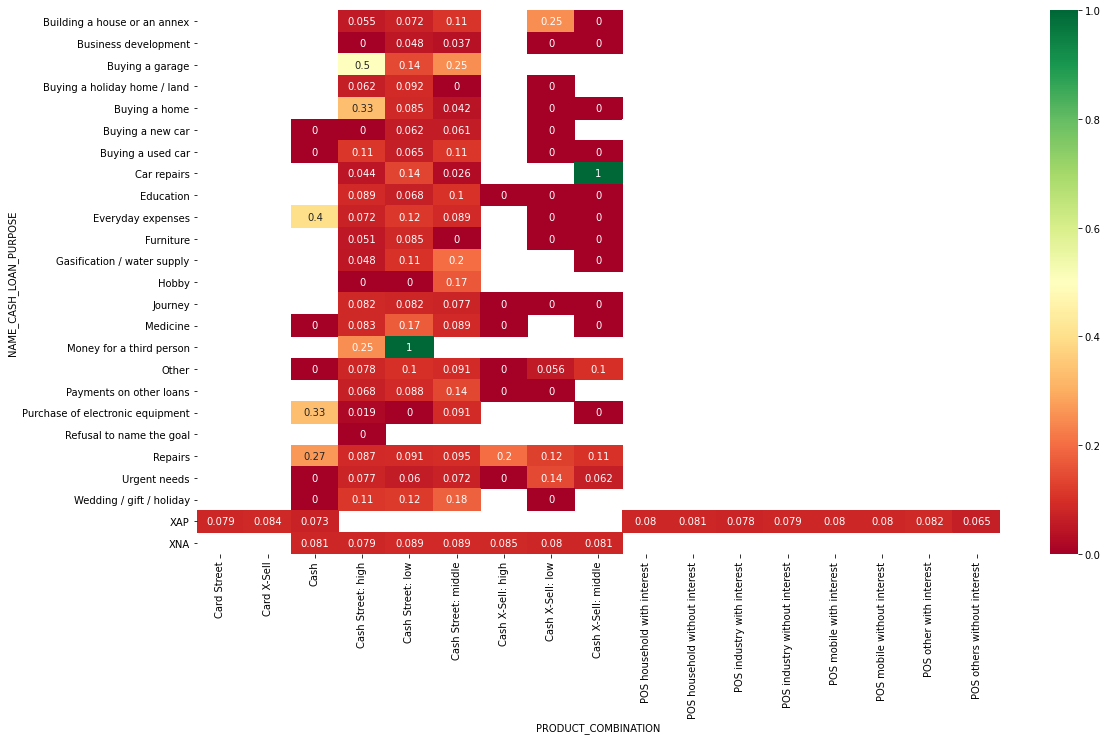

In [86]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=pre_app, index="NAME_CASH_LOAN_PURPOSE", columns="PRODUCT_COMBINATION", values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

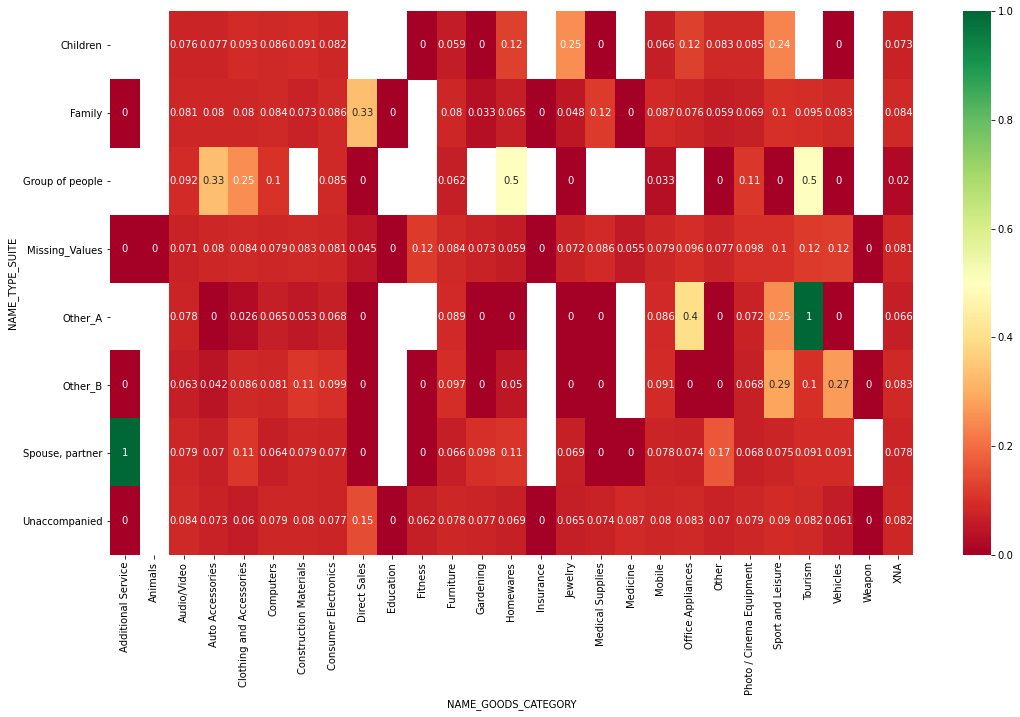

In [87]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=pre_app, index="NAME_TYPE_SUITE", columns="NAME_GOODS_CATEGORY", values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

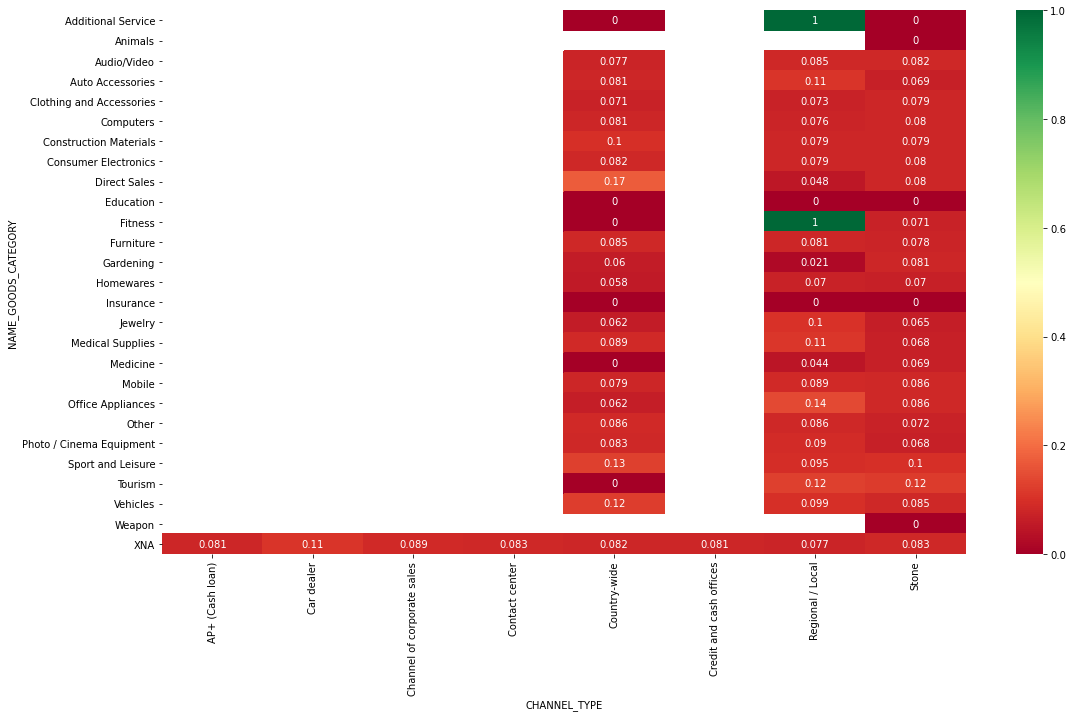

In [88]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=pre_app, index="NAME_GOODS_CATEGORY", columns="CHANNEL_TYPE", values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

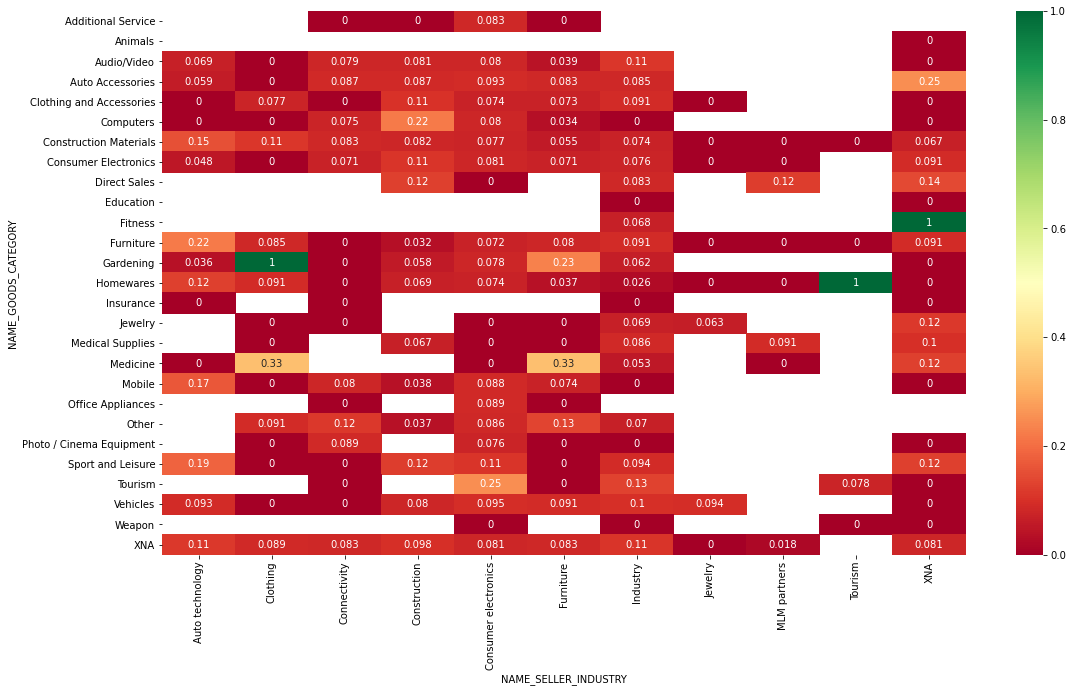

In [89]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=pre_app, index="NAME_GOODS_CATEGORY", columns="NAME_SELLER_INDUSTRY", values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

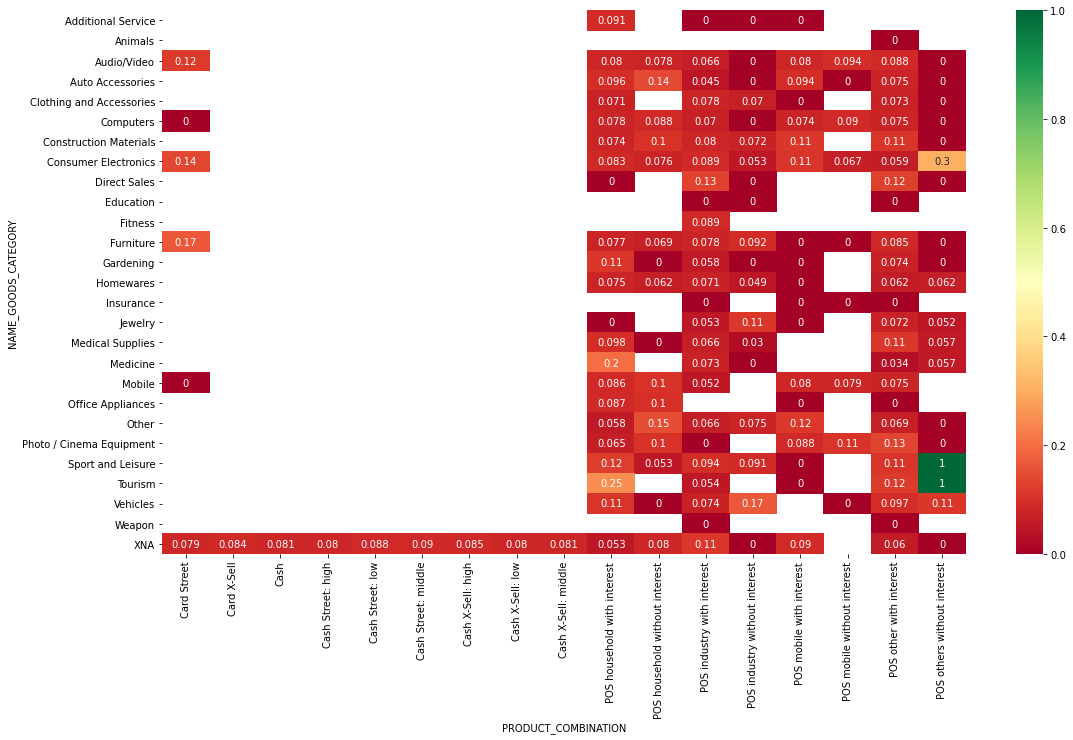

In [90]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=pre_app, index="NAME_GOODS_CATEGORY", columns="PRODUCT_COMBINATION", values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

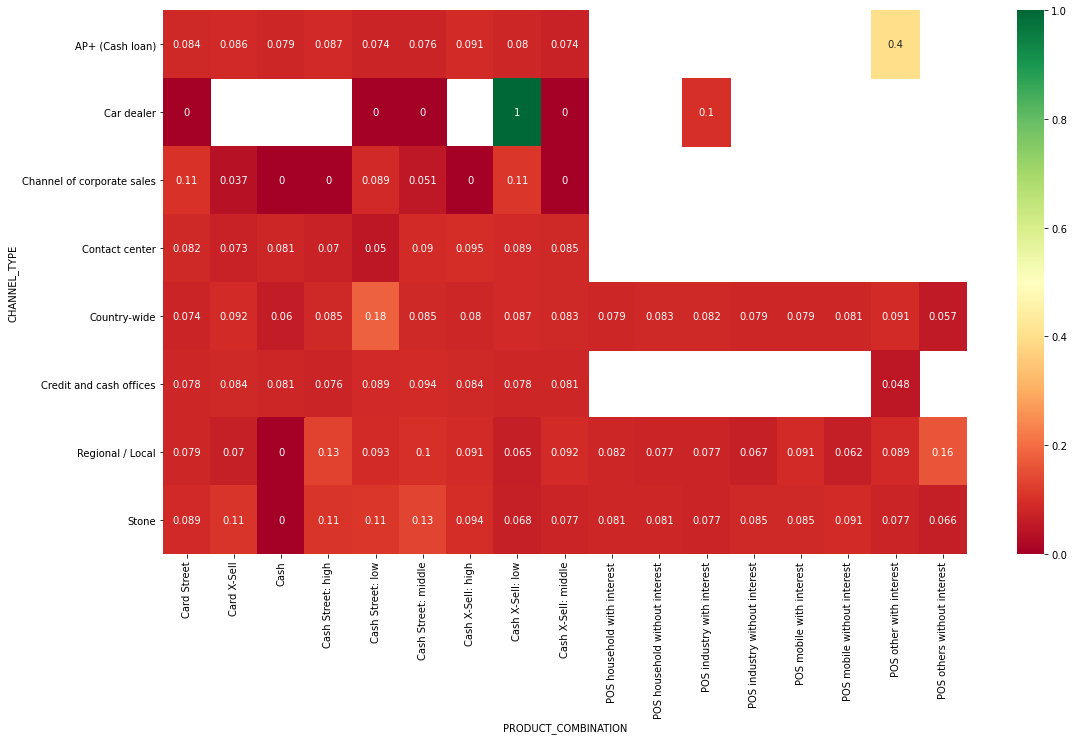

In [91]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=pre_app, index="CHANNEL_TYPE", columns="PRODUCT_COMBINATION", values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

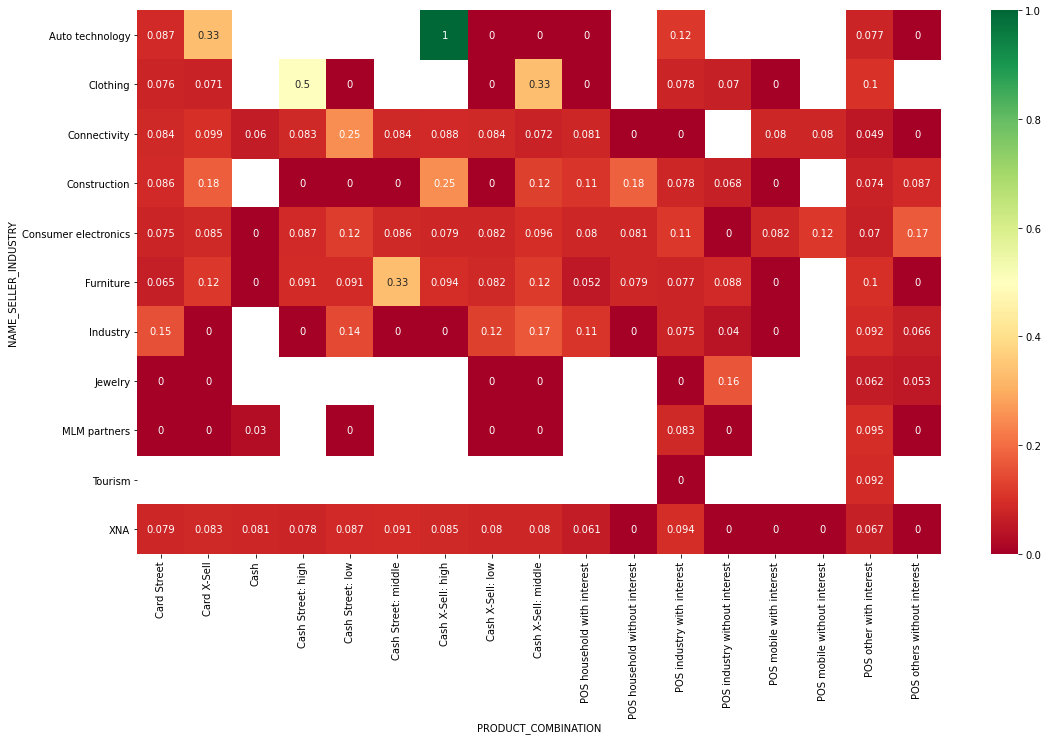

In [92]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=pre_app, index="NAME_SELLER_INDUSTRY", columns="PRODUCT_COMBINATION", values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

In [93]:
pre_app.dtypes

SK_ID_CURR                      int64
AMT_APPLICATION               float64
AMT_CREDIT                    float64
WEEKDAY_APPR_PROCESS_START     object
HOUR_APPR_PROCESS_START         int64
NFLAG_LAST_APPL_IN_DAY          int64
NAME_CASH_LOAN_PURPOSE         object
NAME_CONTRACT_STATUS           object
DAYS_DECISION                   int64
CODE_REJECT_REASON             object
NAME_TYPE_SUITE                object
NAME_GOODS_CATEGORY            object
NAME_PRODUCT_TYPE              object
CHANNEL_TYPE                   object
SELLERPLACE_AREA                int64
NAME_SELLER_INDUSTRY           object
PRODUCT_COMBINATION            object
TARGET                        float64
dtype: object

#### Conclusion from Previous application data:

We can understand that, with numerical values we can't do anything. AMT_CREDIT and AMT_APPLICATION are corealted. But normally what amount we ask, bank will give nealry that amount only. So if we look this statement logically, there is no use of any numerical column. So let's drop all the numerical columns and do the application data analysis.

In [94]:
pre_app.drop(['AMT_APPLICATION','AMT_CREDIT','HOUR_APPR_PROCESS_START','NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','SELLERPLACE_AREA','TARGET'],inplace=True,axis=1)

In [95]:
pre_app.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   SK_ID_CURR                  307511 non-null  int64 
 1   WEEKDAY_APPR_PROCESS_START  307511 non-null  object
 2   NAME_CASH_LOAN_PURPOSE      307511 non-null  object
 3   NAME_CONTRACT_STATUS        307511 non-null  object
 4   CODE_REJECT_REASON          307511 non-null  object
 5   NAME_TYPE_SUITE             307511 non-null  object
 6   NAME_GOODS_CATEGORY         307511 non-null  object
 7   NAME_PRODUCT_TYPE           307511 non-null  object
 8   CHANNEL_TYPE                307511 non-null  object
 9   NAME_SELLER_INDUSTRY        307511 non-null  object
 10  PRODUCT_COMBINATION         307511 non-null  object
dtypes: int64(1), object(10)
memory usage: 28.2+ MB


### Analysing App data

In [96]:
app.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [97]:
app.shape

(307511, 122)

In [98]:
app1 = app[app.TARGET == 1] #people who have payment difficulties
app0 = app[app.TARGET == 0] #people without payment difficuties

##### Bin the columns and do the analysis

In [99]:
a = app.iloc[:,:22]
b = app.iloc[:,22:44]
c = app.iloc[:,44:96]
d = app.iloc[:,96:124]

In [100]:
a.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0  ...           Working  Secondary / secondary special  Single / not married   
1  ...     State servant               Higher education               Married   
2  ...           Working  Secondary / secondary special  Single / not married   
3  ...           Working  Secondary / secondary special        Civil marriage   
4  ...           Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE REGION_POPULATION_RELATIVE DAYS_BIRTH  DAYS_EMPLOYED  \
0  House / apartment                   0.018801      -9461           -637   
1  House / apartment                   0.003541     -16765          -1188   
2  House / apartment                   0.010032     -19046           -225   
3  House / apartment                   0.008019     -19005          -3039   
4  House / apartment                   0.028663     -19932          -3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  
0            -3648.0            -2120          NaN  
1            -1186.0             -291          NaN  
2            -4260.0            -2531         26.0  
3            -9833.0            -2437          NaN  
4            -4311.0            -3458          NaN  

[5 rows x 22 columns]

In [101]:
b.head()

FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0           1               1                0                 1           1   
1           1               1                0                 1           1   
2           1               1                1                 1           1   
3           1               1                0                 1           0   
4           1               1                0                 1           0   

   FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0           0        Laborers              1.0                     2   
1           0      Core staff              2.0                     1   
2           0        Laborers              1.0                     2   
3           0        Laborers              2.0                     2   
4           0      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  ... REG_REGION_NOT_LIVE_REGION  \
0                            2  ...                          0   
1                            1  ...                          0   
2                            2  ...                          0   
3                            2  ...                          0   
4                            2  ...                          0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       0                       0                        0   
4                       0                       1                        1   

        ORGANIZATION_TYPE  EXT_SOURCE_1 EXT_SOURCE_2  EXT_SOURCE_3  
0  Business Entity Type 3      0.083037     0.262949      0.139376  
1                  School      0.311267     0.622246           NaN  
2              Government           NaN     0.555912      0.729567  
3  Business Entity Type 3           NaN     0.650442           NaN  
4                Religion           NaN     0.322738           NaN  

[5 rows x 22 columns]

In [102]:
c.head()

APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0          0.0247            0.0369                       0.9722   
1          0.0959            0.0529                       0.9851   
2             NaN               NaN                          NaN   
3             NaN               NaN                          NaN   
4             NaN               NaN                          NaN   

   YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0           0.6192          0.0143           0.00         0.0690   
1           0.7960          0.0605           0.08         0.0345   
2              NaN             NaN            NaN            NaN   
3              NaN             NaN            NaN            NaN   
4              NaN             NaN            NaN            NaN   

   FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  ...  FONDKAPREMONT_MODE  \
0         0.0833         0.1250        0.0369  ...    reg oper account   
1         0.2917         0.3333        0.0130  ...    reg oper account   
2            NaN            NaN           NaN  ...                 NaN   
3            NaN            NaN           NaN  ...                 NaN   
4            NaN            NaN           NaN  ...                 NaN   

   HOUSETYPE_MODE  TOTALAREA_MODE  WALLSMATERIAL_MODE  EMERGENCYSTATE_MODE  \
0  block of flats          0.0149        Stone, brick                   No   
1  block of flats          0.0714               Block                   No   
2             NaN             NaN                 NaN                  NaN   
3             NaN             NaN                 NaN                  NaN   
4             NaN             NaN                 NaN                  NaN   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  
0                       2.0                       2.0                 -1134.0  
1                       1.0                       0.0                  -828.0  
2                       0.0                       0.0                  -815.0  
3                       2.0                       0.0                  -617.0  
4                       0.0                       0.0                 -1106.0  

[5 rows x 52 columns]

In [103]:
d.head()

FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0                0                1                0                0   
1                0                1                0                0   
2                0                0                0                0   
3                0                1                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                1                0   

   FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  ...  FLAG_DOCUMENT_18  \
0                 0                 0  ...                 0   
1                 0                 0  ...                 0   
2                 0                 0  ...                 0   
3                 0                 0  ...                 0   
4                 0                 0  ...                 0   

   FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                 0                 0                 0   
1                 0                 0                 0   
2                 0                 0                 0   
3                 0                 0                 0   
4                 0                 0                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 26 columns]

In [104]:
d.isnull().sum()

FLAG_DOCUMENT_2                   0
FLAG_DOCUMENT_3                   0
FLAG_DOCUMENT_4                   0
FLAG_DOCUMENT_5                   0
FLAG_DOCUMENT_6                   0
FLAG_DOCUMENT_7                   0
FLAG_DOCUMENT_8                   0
FLAG_DOCUMENT_9                   0
FLAG_DOCUMENT_10                  0
FLAG_DOCUMENT_11                  0
FLAG_DOCUMENT_12                  0
FLAG_DOCUMENT_13                  0
FLAG_DOCUMENT_14                  0
FLAG_DOCUMENT_15                  0
FLAG_DOCUMENT_16                  0
FLAG_DOCUMENT_17                  0
FLAG_DOCUMENT_18                  0
FLAG_DOCUMENT_19                  0
FLAG_DOCUMENT_20                  0
FLAG_DOCUMENT_21                  0
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [105]:
d.columns

Index(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [106]:
#Calculating the missing value percentage

d.AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()/d.shape[0]

0.13501630835970097

##### Analysing the missing value columns

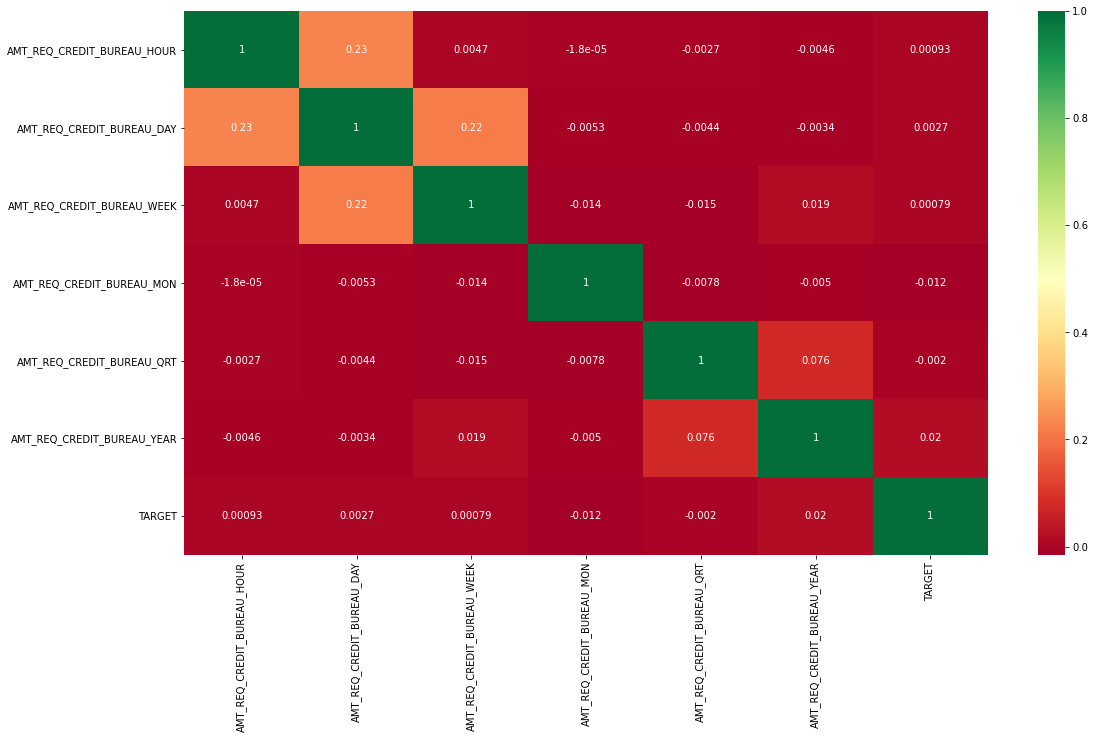

In [107]:
plt.figure(figsize=(18,10))
sns.heatmap(app[['AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR','TARGET']].corr(), annot= True, cmap= "RdYlGn",center=0.5)
plt.show()

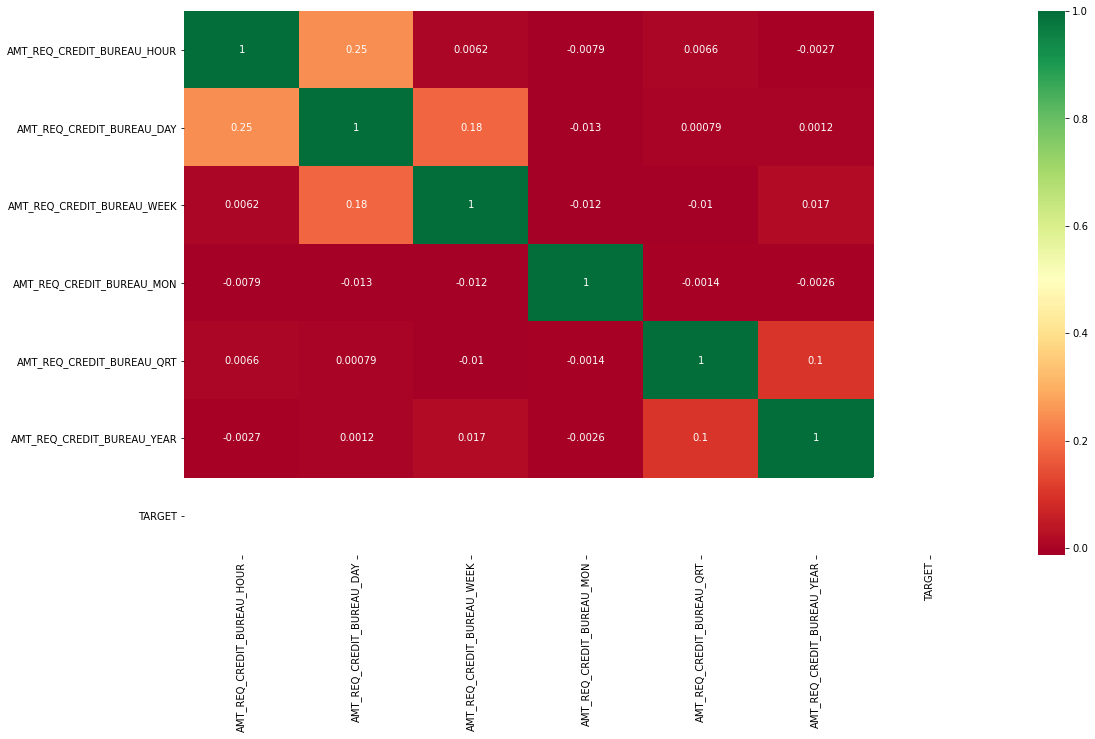

In [108]:
plt.figure(figsize=(18,10))
sns.heatmap(app1[['AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR','TARGET']].corr(), annot= True, cmap= "RdYlGn",center=0.5)
plt.show()

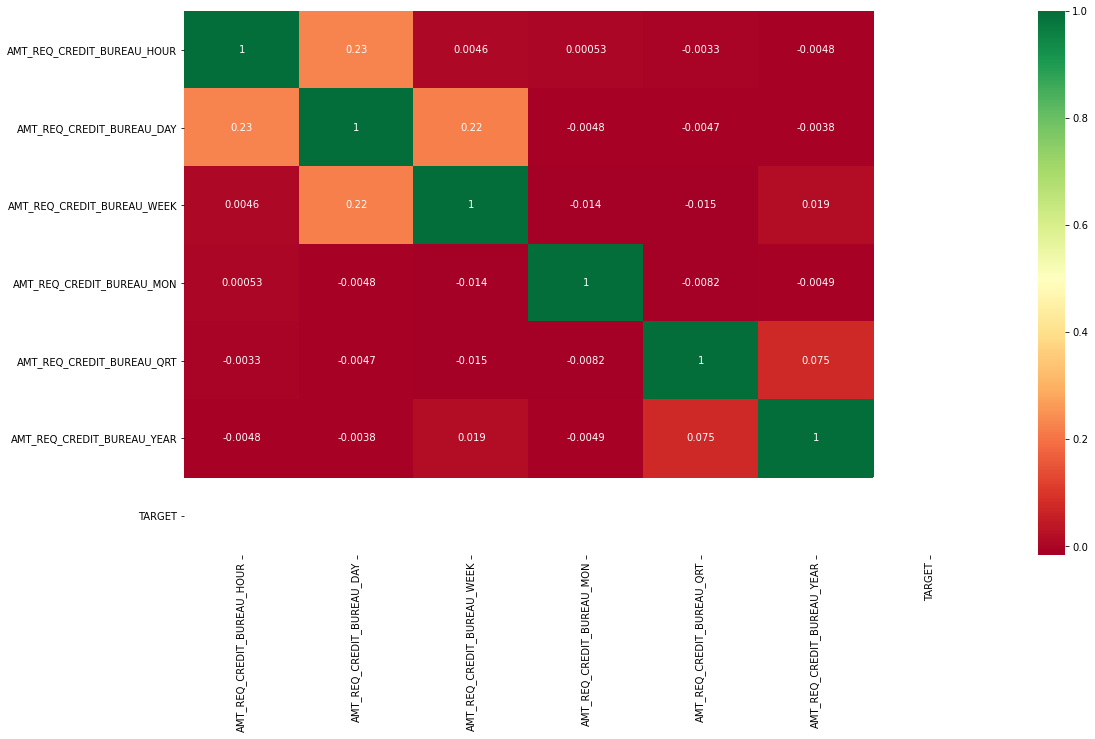

In [109]:
plt.figure(figsize=(18,10))
sns.heatmap(app0[['AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR','TARGET']].corr(), annot= True, cmap= "RdYlGn",center=0.5)
plt.show()

In [110]:
d.drop(['AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],inplace=True,axis=1)

<AxesSubplot:>

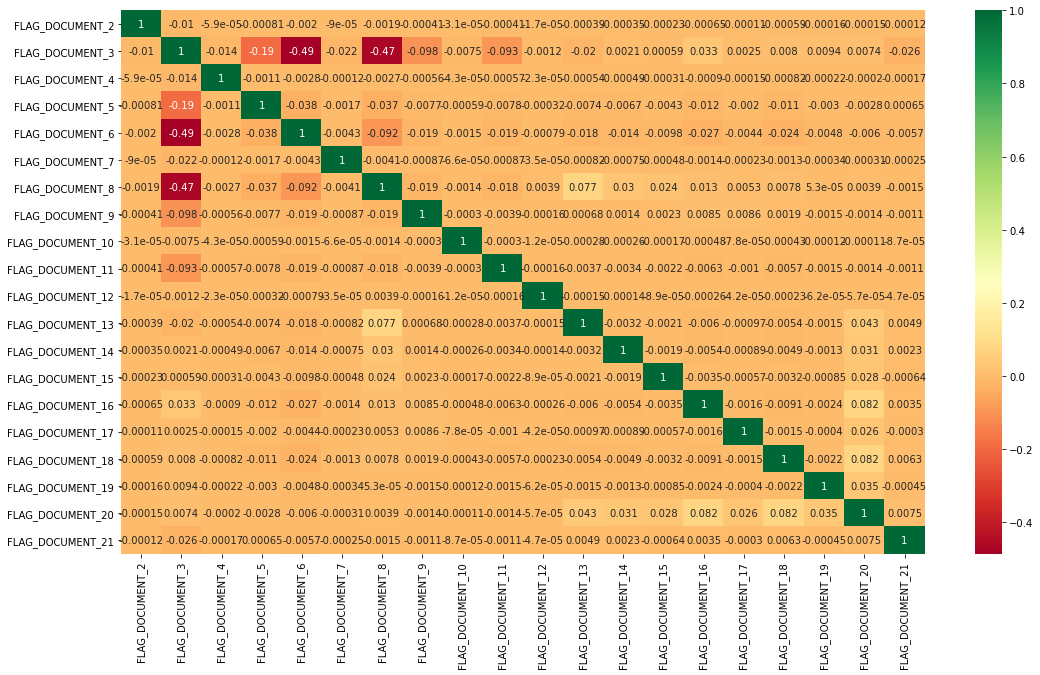

In [111]:
plt.figure(figsize=(18,10))
sns.heatmap(app.iloc[:,96:116].corr(), annot= True, cmap= "RdYlGn")

<AxesSubplot:>

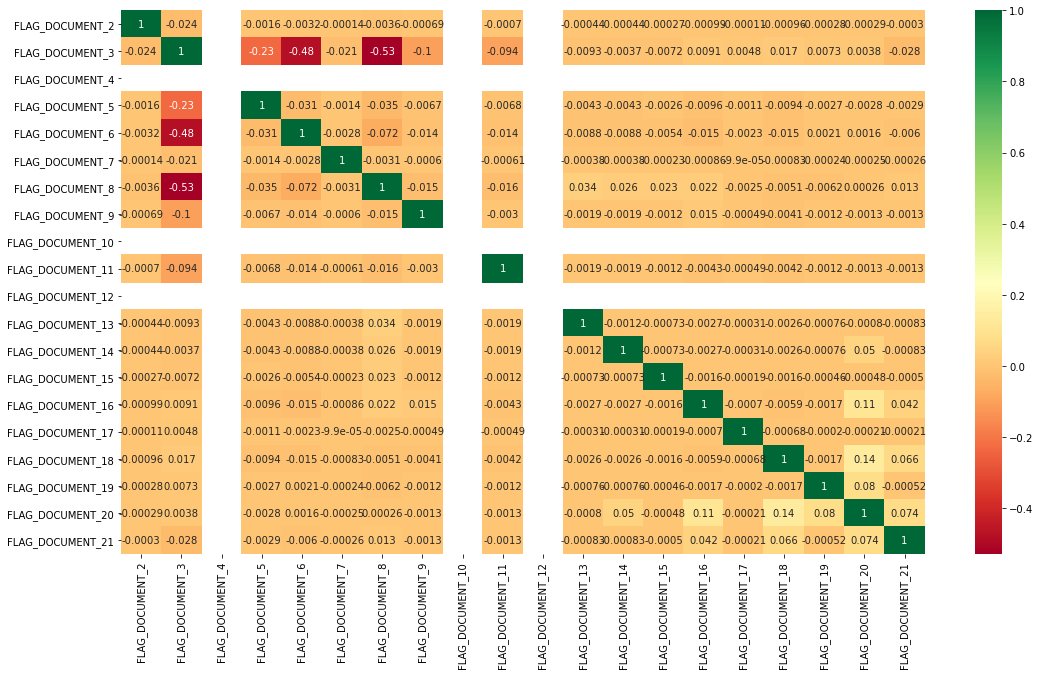

In [112]:
plt.figure(figsize=(18,10))
sns.heatmap(app1.iloc[:,96:116].corr(), annot= True, cmap= "RdYlGn")

In [113]:
app.groupby('TARGET')['FLAG_DOCUMENT_4'].value_counts()

TARGET  FLAG_DOCUMENT_4
0       0                  282661
        1                      25
1       0                   24825
Name: FLAG_DOCUMENT_4, dtype: int64

In [114]:
app.groupby('TARGET')['FLAG_DOCUMENT_10'].value_counts()

TARGET  FLAG_DOCUMENT_10
0       0                   282679
        1                        7
1       0                    24825
Name: FLAG_DOCUMENT_10, dtype: int64

In [115]:
app.groupby('TARGET')['FLAG_DOCUMENT_12'].value_counts()

TARGET  FLAG_DOCUMENT_12
0       0                   282684
        1                        2
1       0                    24825
Name: FLAG_DOCUMENT_12, dtype: int64

#### Conc from d:

The people who didn't submit the document 4,10,12 are mostly the defaulters.

In [116]:
app.drop(app1.iloc[:,96:116],inplace=True,axis=1)

In [117]:
c.isnull().sum()/ c.shape[0] *100

APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                  50.348768
FLOORSMAX_MODE                  49.760822
FLOORSMIN_MODE                  67.848630
LANDAREA_MODE                   59

#### Droping the columns which have more null values that 40%.

In [118]:
c.columns

Index(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_M

In [119]:
app.drop(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],inplace=True,axis=1)

<AxesSubplot:>

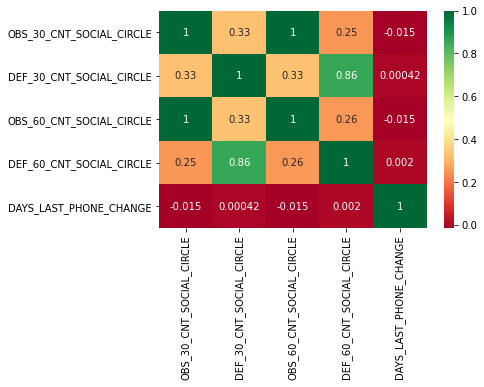

In [120]:
sns.heatmap(app.loc[:,'OBS_30_CNT_SOCIAL_CIRCLE':'DAYS_LAST_PHONE_CHANGE'].corr(), annot= True, cmap= "RdYlGn")

<AxesSubplot:>

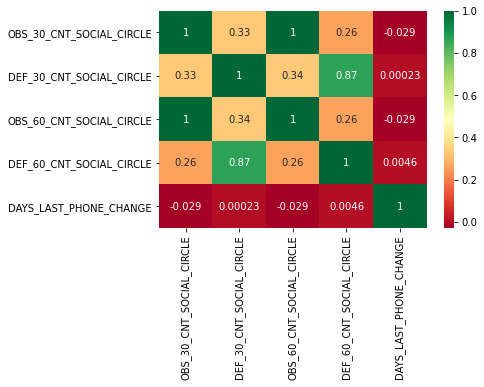

In [121]:
sns.heatmap(app1.loc[:,'OBS_30_CNT_SOCIAL_CIRCLE':'DAYS_LAST_PHONE_CHANGE'].corr(), annot= True, cmap= "RdYlGn")

In [122]:
##### Let's drop it

In [123]:
app.drop(app.loc[:,'OBS_30_CNT_SOCIAL_CIRCLE':'DAYS_LAST_PHONE_CHANGE'],inplace=True,axis=1)

In [124]:
app.shape

(307511, 50)

In [125]:
b.isnull().sum()

FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
OCCUPATION_TYPE                 96391
CNT_FAM_MEMBERS                     2
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT_WORK_CITY              0
LIVE_CITY_NOT_WORK_CITY             0
ORGANIZATION_TYPE                   0
EXT_SOURCE_1                   173378
EXT_SOURCE_2                      660
EXT_SOURCE_3                    60965
dtype: int64

<AxesSubplot:>

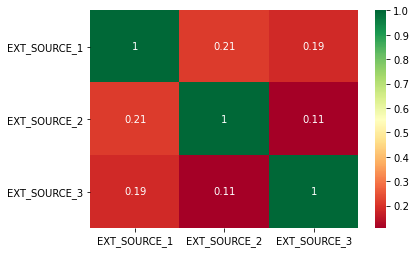

In [126]:
sns.heatmap(app.loc[:,'EXT_SOURCE_1':'EXT_SOURCE_3'].corr(), annot= True, cmap= "RdYlGn")

<AxesSubplot:>

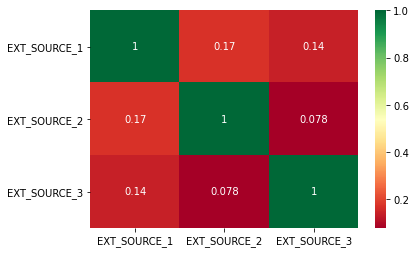

In [127]:
sns.heatmap(app1.loc[:,'EXT_SOURCE_1':'EXT_SOURCE_3'].corr(), annot= True, cmap= "RdYlGn")

In [128]:
app.drop(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'],inplace=True,axis=1)

###### No specials details found in the above columns. So it dropped from data set.

In [129]:
#calculating missing values in percentage
app.OCCUPATION_TYPE.isnull().sum()/app.shape[0] *100

31.345545362604916

In [130]:
app.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [131]:
app['OCCUPATION_TYPE'].fillna("Missing_Values", inplace= True)
app['OCCUPATION_TYPE'].isnull().sum()

0

<AxesSubplot:>

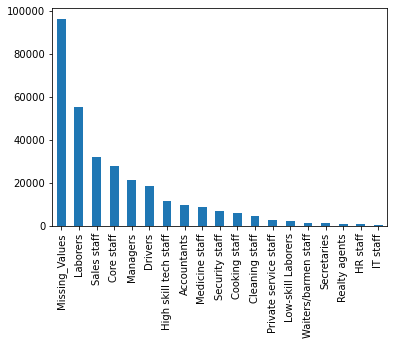

In [132]:
app.OCCUPATION_TYPE.value_counts().plot.bar()

In [133]:
app.CNT_FAM_MEMBERS.value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
16.0         2
14.0         2
20.0         2
12.0         2
15.0         1
11.0         1
13.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [134]:
app['CNT_FAM_MEMBERS'].fillna(2.0, inplace= True)
app['CNT_FAM_MEMBERS'].isnull().sum()

0

##### Reason:
In CNT_FAMILY_MEMBERS, the mode is 2.0. 

<AxesSubplot:>

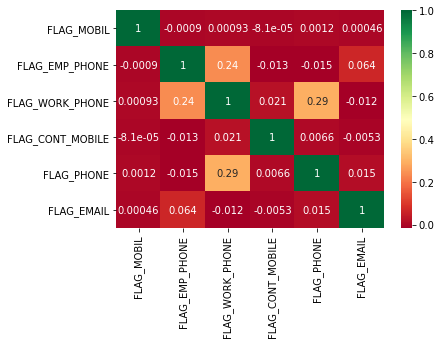

In [135]:
sns.heatmap(app0.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'].corr(), annot= True, cmap= "RdYlGn")

<AxesSubplot:>

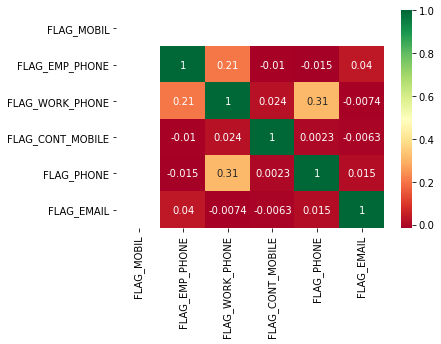

In [136]:
sns.heatmap(app1.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'].corr(), annot= True, cmap= "RdYlGn")

In [137]:
app.groupby('TARGET')['FLAG_MOBIL'].value_counts()

TARGET  FLAG_MOBIL
0       1             282685
        0                  1
1       1              24825
Name: FLAG_MOBIL, dtype: int64

##### Conc:
People who have flag_mobil( if the person didn't submit the mobile number) are defaulters.

In [138]:
app.drop(app.loc[:,'FLAG_MOBIL':'FLAG_EMAIL'],inplace=True,axis=1)

In [139]:
b.columns

Index(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'],
      dtype='object')

<AxesSubplot:>

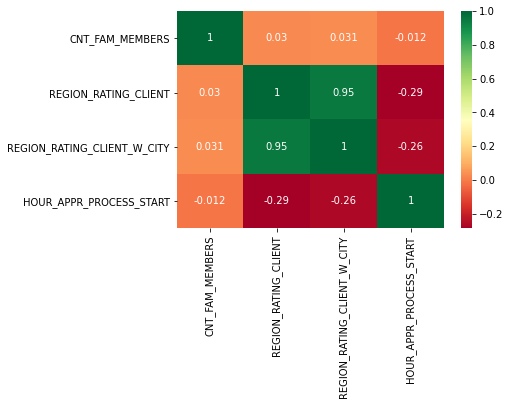

In [140]:

sns.heatmap(app.loc[:,'CNT_FAM_MEMBERS':'HOUR_APPR_PROCESS_START'].corr(), annot= True, cmap= "RdYlGn")

In [141]:
#nothing specially found
app.drop(app.loc[:,'CNT_FAM_MEMBERS':'HOUR_APPR_PROCESS_START'],inplace=True,axis=1)

<AxesSubplot:>

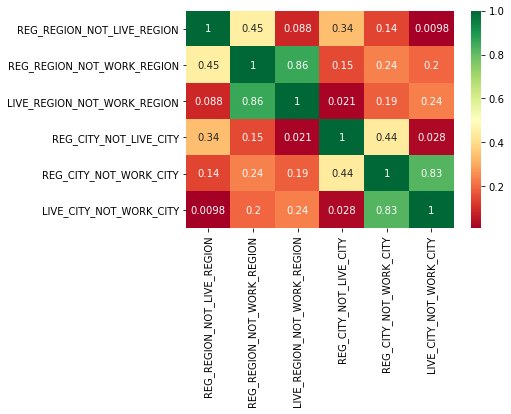

In [142]:
sns.heatmap(app.loc[:,'REG_REGION_NOT_LIVE_REGION':'LIVE_CITY_NOT_WORK_CITY'].corr(), annot= True, cmap= "RdYlGn")

##### Why?

Even though some results are corelated with some values, it is not useful to find a particular defaulters.

In [143]:
app.drop(app.loc[:,'REG_REGION_NOT_LIVE_REGION':'LIVE_CITY_NOT_WORK_CITY'],inplace=True,axis=1)

In [144]:
app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
OCCUPATION_TYPE                    0
ORGANIZATION_TYPE                  0
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
A

In [145]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [146]:
app.drop(['AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],inplace=True,axis=1)

In [147]:
app.shape

(307511, 24)

##### Univariate analysis for own_car_age

In [148]:
app.OWN_CAR_AGE.isnull().sum()

202929

In [149]:
app.OWN_CAR_AGE.value_counts()

7.0     7424
6.0     6382
3.0     6370
8.0     5887
2.0     5852
        ... 
50.0       1
47.0       1
52.0       1
69.0       1
56.0       1
Name: OWN_CAR_AGE, Length: 62, dtype: int64

<AxesSubplot:ylabel='Frequency'>

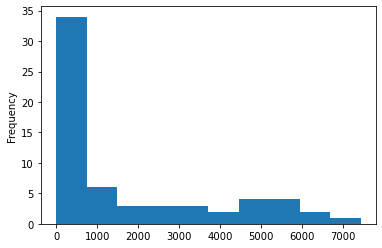

In [150]:
app.OWN_CAR_AGE.value_counts().plot.hist()

In [151]:
app.OWN_CAR_AGE.isnull().sum()

202929

##### Soln:

There are lot of missing values there in this column. If we put mean or median value, it may affect. The missing values are people don't have car. So I put -1 for people who don't have car.

In [152]:
app['OWN_CAR_AGE'].fillna(-1, inplace= True)
app['OWN_CAR_AGE'].isnull().sum()

0

###### Univariate analysis for NAMW_TYPE_SUITE

In [153]:
app.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [154]:
app.NAME_TYPE_SUITE.isnull().sum()/app.shape[0]

0.004201475719567756

In [155]:
#filling null values with the mode
app['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace= True)
app['NAME_TYPE_SUITE'].isnull().sum()

0

<AxesSubplot:>

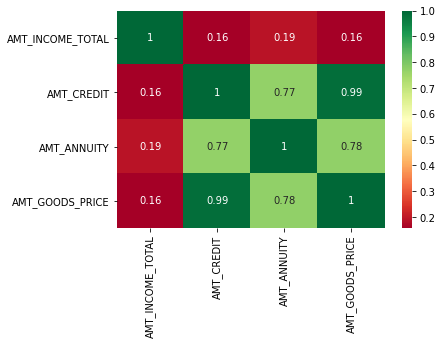

In [156]:
sns.heatmap(app[['AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].corr(), annot= True, cmap= "RdYlGn")

<AxesSubplot:>

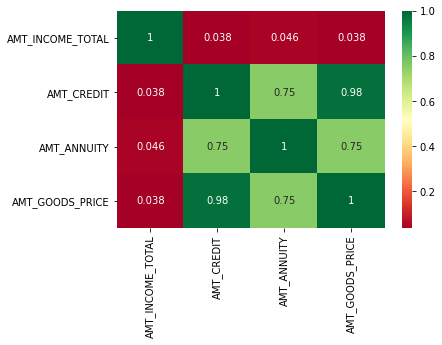

In [157]:
sns.heatmap(app1[['AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']].corr(), annot= True, cmap= "RdYlGn")

In [158]:
#above columns corelated but its same in non defaulter and defaulters too.
app.drop(['AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'],inplace=True,axis=1)

In [159]:
app.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
OWN_CAR_AGE                   0
OCCUPATION_TYPE               0
ORGANIZATION_TYPE             0
dtype: int64

<AxesSubplot:>

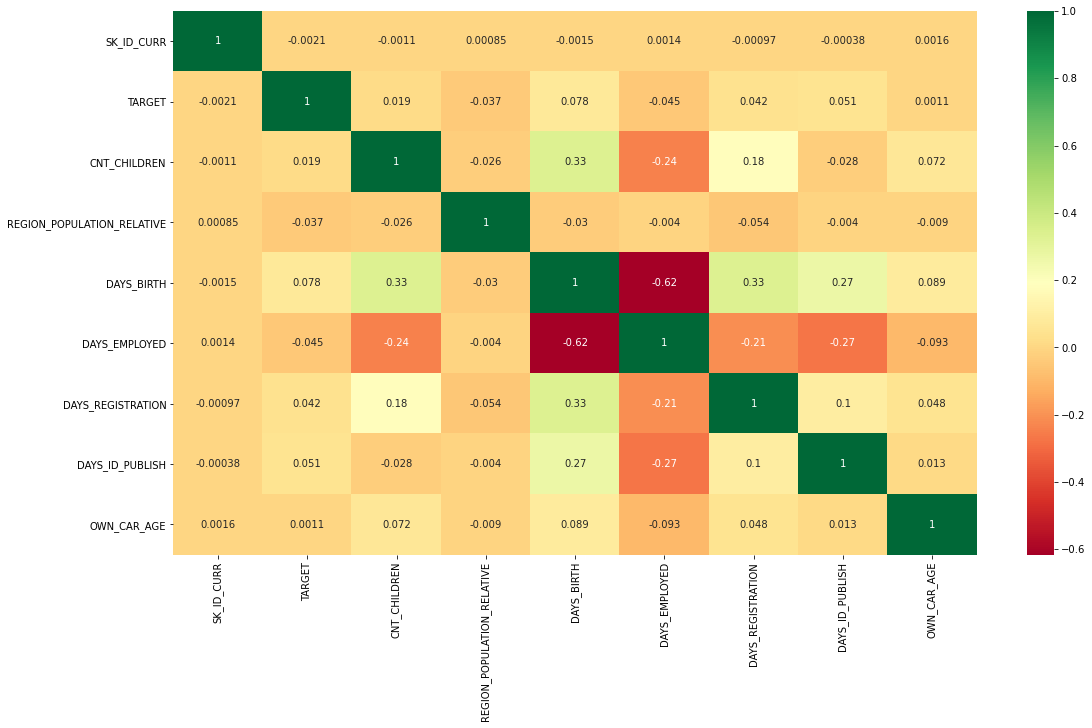

In [160]:
plt.figure(figsize=(18,10))
sns.heatmap(app.corr(), annot= True, cmap= "RdYlGn")

In [161]:
app1 = app[app.TARGET == 1] #people who have payment difficulties
app0 = app[app.TARGET == 0] #people without payment difficuties

<AxesSubplot:>

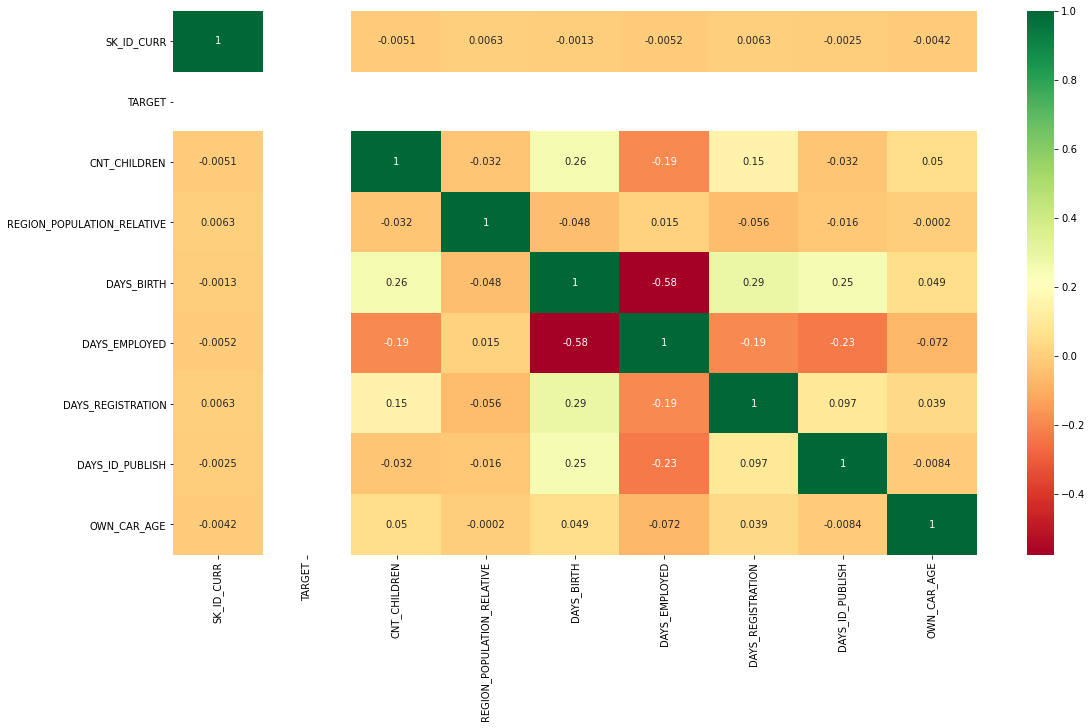

In [162]:
plt.figure(figsize=(18,10))
sns.heatmap(app1.corr(), annot= True, cmap= "RdYlGn")

<AxesSubplot:>

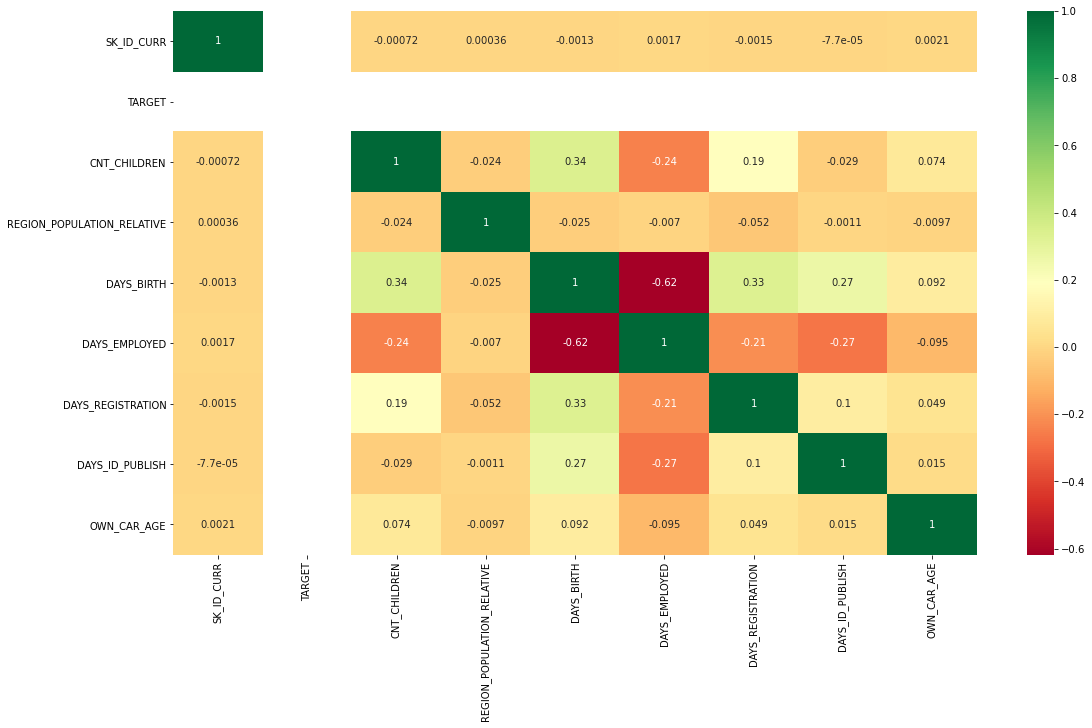

In [163]:
plt.figure(figsize=(18,10))
sns.heatmap(app0.corr(), annot= True, cmap= "RdYlGn")

#### Let's drop unwanted numerical columns

In [164]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

###### Soln:

With the help of numerical columns, we can predict where its higher or lower. But we can't predict exaclty who is becoming a defaulter. So I planned to drop all the numercal columns and only consider the categorical columns

In [165]:
app.drop(['CNT_CHILDREN','REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE'],inplace=True,axis=1)

In [166]:
app.shape

(307511, 13)

In [167]:
app1 = app[app.TARGET == 1] #people who have payment difficulties
app0 = app[app.TARGET == 0] #people without payment difficuties

In [168]:
app.dtypes

SK_ID_CURR              int64
TARGET                  int64
NAME_CONTRACT_TYPE     object
CODE_GENDER            object
FLAG_OWN_CAR           object
FLAG_OWN_REALTY        object
NAME_TYPE_SUITE        object
NAME_INCOME_TYPE       object
NAME_EDUCATION_TYPE    object
NAME_FAMILY_STATUS     object
NAME_HOUSING_TYPE      object
OCCUPATION_TYPE        object
ORGANIZATION_TYPE      object
dtype: object

In [169]:
app.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64

<AxesSubplot:ylabel='NAME_CONTRACT_TYPE'>

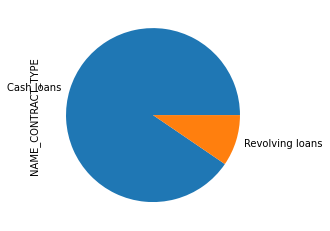

In [170]:
app.NAME_CONTRACT_TYPE.value_counts().plot.pie()

In [171]:
app1.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.935388
Revolving loans    0.064612
Name: NAME_CONTRACT_TYPE, dtype: float64

<AxesSubplot:ylabel='NAME_CONTRACT_TYPE'>

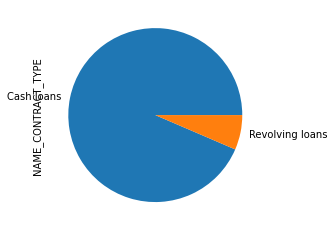

In [172]:
app1.NAME_CONTRACT_TYPE.value_counts().plot.pie()

In [173]:
app.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [174]:
app.CODE_GENDER.value_counts(normalize=True)

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64

In [175]:
##### dropping XNA (4 values won't affect anything)
app = app[~(app.CODE_GENDER == "XNA")]

In [176]:
app.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [177]:
app0.CODE_GENDER.value_counts(normalize=True)

F      0.666032
M      0.333954
XNA    0.000014
Name: CODE_GENDER, dtype: float64

In [178]:
app1.CODE_GENDER.value_counts(normalize=True)

F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64

In [179]:
app.groupby('TARGET')['CODE_GENDER'].value_counts(normalize=True)

TARGET  CODE_GENDER
0       F              0.666042
        M              0.333958
1       F              0.570796
        M              0.429204
Name: CODE_GENDER, dtype: float64

<AxesSubplot:xlabel='TARGET,CODE_GENDER'>

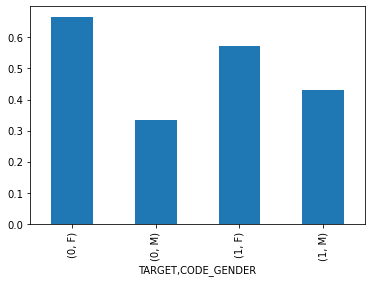

In [180]:
app.groupby('TARGET')['CODE_GENDER'].value_counts(normalize=True).plot.bar()

##### Conc:

Male ratio is bit increasing in defaulters

In [181]:
app.FLAG_OWN_CAR.value_counts(normalize=True)

N    0.659894
Y    0.340106
Name: FLAG_OWN_CAR, dtype: float64

In [182]:
app0.FLAG_OWN_CAR.value_counts(normalize=True)

N    0.656824
Y    0.343176
Name: FLAG_OWN_CAR, dtype: float64

In [183]:
app1.FLAG_OWN_CAR.value_counts(normalize=True)

N    0.694824
Y    0.305176
Name: FLAG_OWN_CAR, dtype: float64

<AxesSubplot:xlabel='TARGET,FLAG_OWN_CAR'>

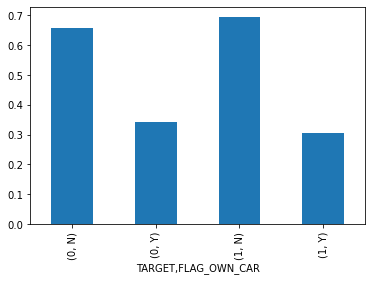

In [184]:
app.groupby('TARGET')['FLAG_OWN_CAR'].value_counts(normalize=True).plot.bar()

#### Cons:

Sligtly yes is reducing in defaulters side. But not that much difference.

In [185]:
app.FLAG_OWN_REALTY.value_counts(normalize=True)

Y    0.693669
N    0.306331
Name: FLAG_OWN_REALTY, dtype: float64

In [186]:
app0.FLAG_OWN_REALTY.value_counts(normalize=True)

Y    0.694513
N    0.305487
Name: FLAG_OWN_REALTY, dtype: float64

In [187]:
app1.FLAG_OWN_REALTY.value_counts(normalize=True)

Y    0.684109
N    0.315891
Name: FLAG_OWN_REALTY, dtype: float64

In [188]:
app.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.812388
Family             0.130560
Spouse, partner    0.036975
Children           0.010624
Other_B            0.005756
Other_A            0.002816
Group of people    0.000881
Name: NAME_TYPE_SUITE, dtype: float64

In [189]:
app0.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.811540
Family             0.131383
Spouse, partner    0.037055
Children           0.010704
Other_B            0.005646
Other_A            0.002795
Group of people    0.000877
Name: NAME_TYPE_SUITE, dtype: float64

In [190]:
app1.NAME_TYPE_SUITE.value_counts(normalize=True)

Unaccompanied      0.822034
Family             0.121208
Spouse, partner    0.036052
Children           0.009708
Other_B            0.007009
Other_A            0.003061
Group of people    0.000926
Name: NAME_TYPE_SUITE, dtype: float64

In [191]:
app.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.516317
Commercial associate    0.232892
Pensioner               0.180035
State servant           0.070577
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

In [192]:
app0.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.507807
Commercial associate    0.234384
Pensioner               0.185294
State servant           0.072356
Student                 0.000064
Unemployed              0.000050
Businessman             0.000035
Maternity leave         0.000011
Name: NAME_INCOME_TYPE, dtype: float64

<AxesSubplot:>

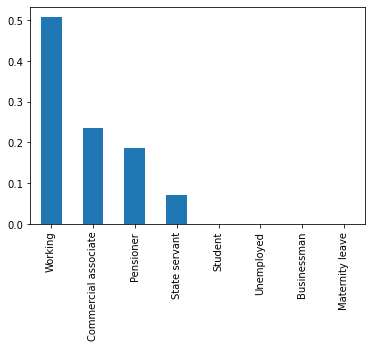

In [193]:
app0.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()

<AxesSubplot:>

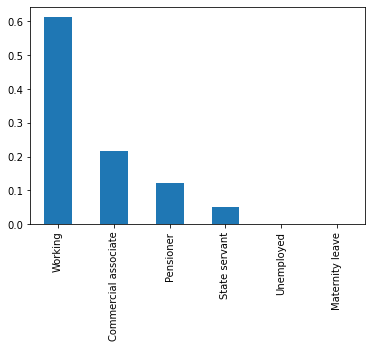

In [194]:
app1.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar()

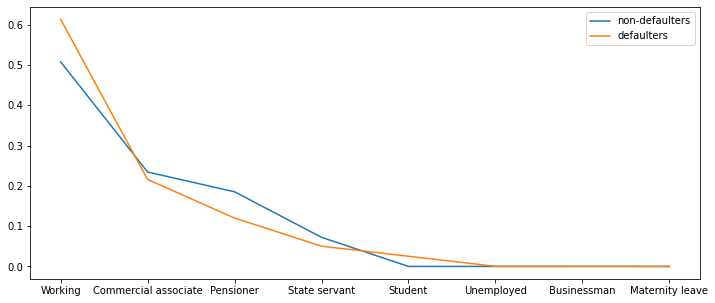

In [195]:
plt.figure(figsize=(12,5))
plt.plot(app0.NAME_INCOME_TYPE.value_counts(normalize=True),label='non-defaulters')
plt.plot(app1.NAME_INCOME_TYPE.value_counts(normalize=True),label='defaulters')
plt.legend()

This graph is saying working people becoming defaulters in more compared to other categories.

In [196]:
app1.NAME_INCOME_TYPE.value_counts(normalize=True)

Working                 0.613253
Commercial associate    0.215911
Pensioner               0.120121
State servant           0.050312
Unemployed              0.000322
Maternity leave         0.000081
Name: NAME_INCOME_TYPE, dtype: float64

<AxesSubplot:ylabel='TARGET,NAME_INCOME_TYPE'>

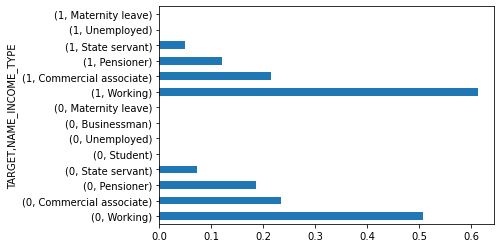

In [197]:
app.groupby('TARGET')['NAME_INCOME_TYPE'].value_counts(normalize=True).plot.barh()

##### COnc:
working people become a defaulter little bit.

In [198]:
app.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.710192
Higher education                 0.243448
Incomplete higher                0.033417
Lower secondary                  0.012409
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64

In [199]:
app0.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.703491
Higher education                 0.250646
Incomplete higher                0.033270
Lower secondary                  0.012024
Academic degree                  0.000570
Name: NAME_EDUCATION_TYPE, dtype: float64

In [200]:
app1.NAME_EDUCATION_TYPE.value_counts(normalize=True)

Secondary / secondary special    0.786465
Higher education                 0.161490
Incomplete higher                0.035126
Lower secondary                  0.016798
Academic degree                  0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64

<AxesSubplot:ylabel='TARGET,NAME_EDUCATION_TYPE'>

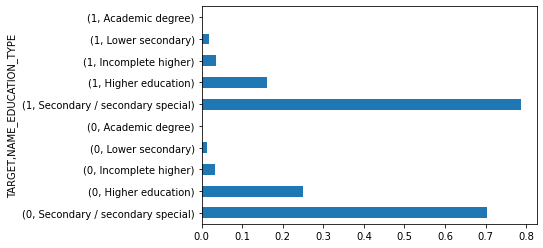

In [201]:
app.groupby('TARGET')['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.barh()

##### Conc:
Secondary people more likely to become defaulters.

In [202]:
app.NAME_FAMILY_STATUS.value_counts(normalize=True)

Married                 0.638779
Single / not married    0.147782
Civil marriage          0.096824
Separated               0.064291
Widow                   0.052318
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

In [203]:
app0.NAME_FAMILY_STATUS.value_counts(normalize=True)

Married                 0.642345
Single / not married    0.144991
Civil marriage          0.094854
Separated               0.064206
Widow                   0.053597
Unknown                 0.000007
Name: NAME_FAMILY_STATUS, dtype: float64

In [204]:
app1.NAME_FAMILY_STATUS.value_counts(normalize=True)

Married                 0.598187
Single / not married    0.179537
Civil marriage          0.119275
Separated               0.065257
Widow                   0.037744
Name: NAME_FAMILY_STATUS, dtype: float64

###### Conc:
Single/Not Married likely to become defaulters.

In [205]:
app.NAME_HOUSING_TYPE.value_counts(normalize=True)

House / apartment      0.887346
With parents           0.048259
Municipal apartment    0.036363
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64

In [206]:
app0.NAME_HOUSING_TYPE.value_counts(normalize=True)

House / apartment      0.890019
With parents           0.046355
Municipal apartment    0.036181
Rented apartment       0.015140
Office apartment       0.008649
Co-op apartment        0.003654
Name: NAME_HOUSING_TYPE, dtype: float64

In [207]:
app1.NAME_HOUSING_TYPE.value_counts(normalize=True)

House / apartment      0.856878
With parents           0.069930
Municipal apartment    0.038469
Rented apartment       0.024209
Office apartment       0.006928
Co-op apartment        0.003585
Name: NAME_HOUSING_TYPE, dtype: float64

<AxesSubplot:xlabel='TARGET,NAME_HOUSING_TYPE'>

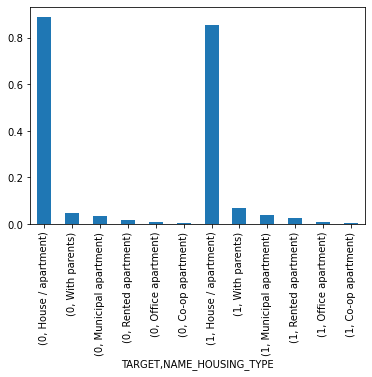

In [208]:
app.groupby('TARGET')['NAME_HOUSING_TYPE'].value_counts(normalize=True).plot.bar()

###### Conc:

Focus on With parents and Rented apartments people more likely to become defaulters.

In [209]:
app.OCCUPATION_TYPE.value_counts(normalize=True)

Missing_Values           0.313453
Laborers                 0.179463
Sales staff              0.104394
Core staff               0.089653
Managers                 0.069498
Drivers                  0.060496
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006803
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

In [210]:
app0.OCCUPATION_TYPE.value_counts(normalize=True)

Missing_Values           0.318774
Laborers                 0.174568
Sales staff              0.102623
Core staff               0.091381
Managers                 0.070902
Drivers                  0.058354
High skill tech staff    0.037777
Accountants              0.033037
Medicine staff           0.028176
Security staff           0.021221
Cooking staff            0.018837
Cleaning staff           0.014879
Private service staff    0.008762
Low-skill Laborers       0.006134
Secretaries              0.004291
Waiters/barmen staff     0.004231
Realty agents            0.002448
HR staff                 0.001864
IT staff                 0.001740
Name: OCCUPATION_TYPE, dtype: float64

In [211]:
app1.OCCUPATION_TYPE.value_counts(normalize=True)

Missing_Values           0.252890
Laborers                 0.235166
Sales staff              0.124552
Drivers                  0.084874
Core staff               0.070010
Managers                 0.053494
Security staff           0.029084
High skill tech staff    0.028238
Cooking staff            0.025015
Medicine staff           0.023041
Accountants              0.019094
Cleaning staff           0.018006
Low-skill Laborers       0.014461
Private service staff    0.007049
Waiters/barmen staff     0.006123
Secretaries              0.003706
Realty agents            0.002377
HR staff                 0.001450
IT staff                 0.001370
Name: OCCUPATION_TYPE, dtype: float64

##### Conc:

Defaulters are most likely to be Laborers

In [212]:
app.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.221107
XNA                       0.180074
Self-employed             0.124914
Other                     0.054252
Medicine                  0.036396
Business Entity Type 2    0.034318
Government                0.033833
School                    0.028920
Trade: type 7             0.025466
Kindergarten              0.022370
Construction              0.021856
Business Entity Type 1    0.019456
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010953
Industry: type 3          0.010657
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

In [213]:
app0.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.218154
XNA                       0.185308
Self-employed             0.122058
Other                     0.054506
Medicine                  0.036988
Government                0.034236
Business Entity Type 2    0.034147
School                    0.029598
Trade: type 7             0.025084
Kindergarten              0.022626
Construction              0.020999
Business Entity Type 1    0.019446
Transport: type 4         0.017323
Industry: type 9          0.011118
Trade: type 3             0.011076
Industry: type 3          0.010365
Security                  0.010340
Housing                   0.009633
Military                  0.008840
Industry: type 11         0.008738
Bank                      0.008409
Police                    0.007867
Agriculture               0.007772
Transport: type 2         0.007188
Postal                    0.006987
Security Ministries       0.006643
Trade: type 2             0.006251
Restaurant                0.005656
Services            

In [214]:
app1.ORGANIZATION_TYPE.value_counts(normalize=True)

Business Entity Type 3    0.254703
Self-employed             0.157422
XNA                       0.120443
Other                     0.051360
Business Entity Type 2    0.036254
Construction              0.031621
Trade: type 7             0.029809
Medicine                  0.029688
Government                0.029245
School                    0.021188
Transport: type 4         0.020181
Business Entity Type 1    0.019617
Kindergarten              0.019496
Trade: type 3             0.014542
Industry: type 3          0.014018
Security                  0.013051
Agriculture               0.010352
Housing                   0.009466
Industry: type 11         0.009426
Industry: type 9          0.009063
Restaurant                0.008540
Transport: type 3         0.007533
Postal                    0.007331
Transport: type 2         0.006928
Military                  0.005438
Trade: type 2             0.005358
Bank                      0.005237
Police                    0.004713
Industry: type 1    

#### Conc:

Some values are bit hard to understand. Lets analyse thruogh heatmap

In [215]:
app1 = app[app.TARGET == 1] #people who have payment difficulties
app0 = app[app.TARGET == 0] #people without payment difficuties

In [216]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

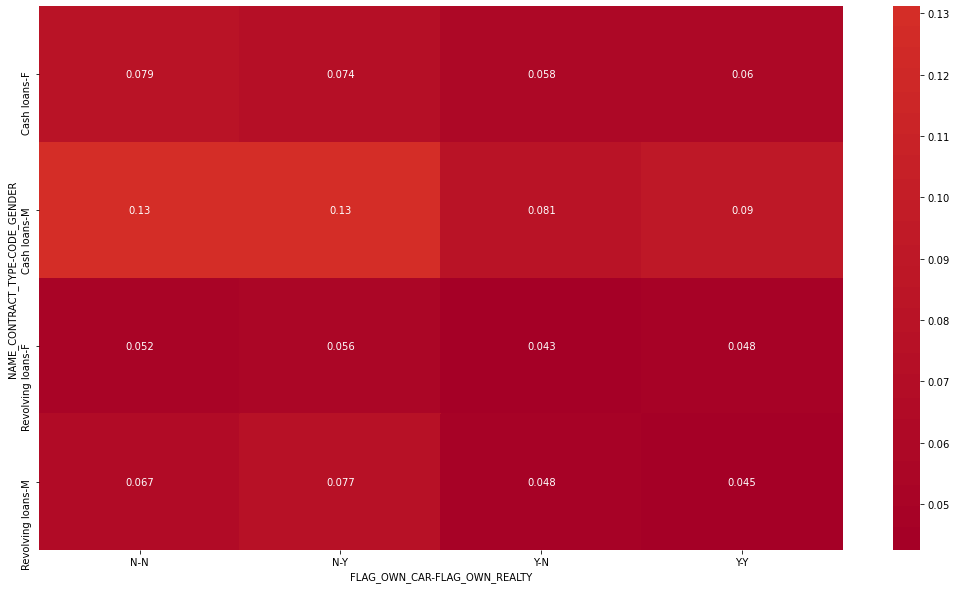

In [217]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=app, index=['NAME_CONTRACT_TYPE', 'CODE_GENDER'], columns=['FLAG_OWN_CAR', 'FLAG_OWN_REALTY'], values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

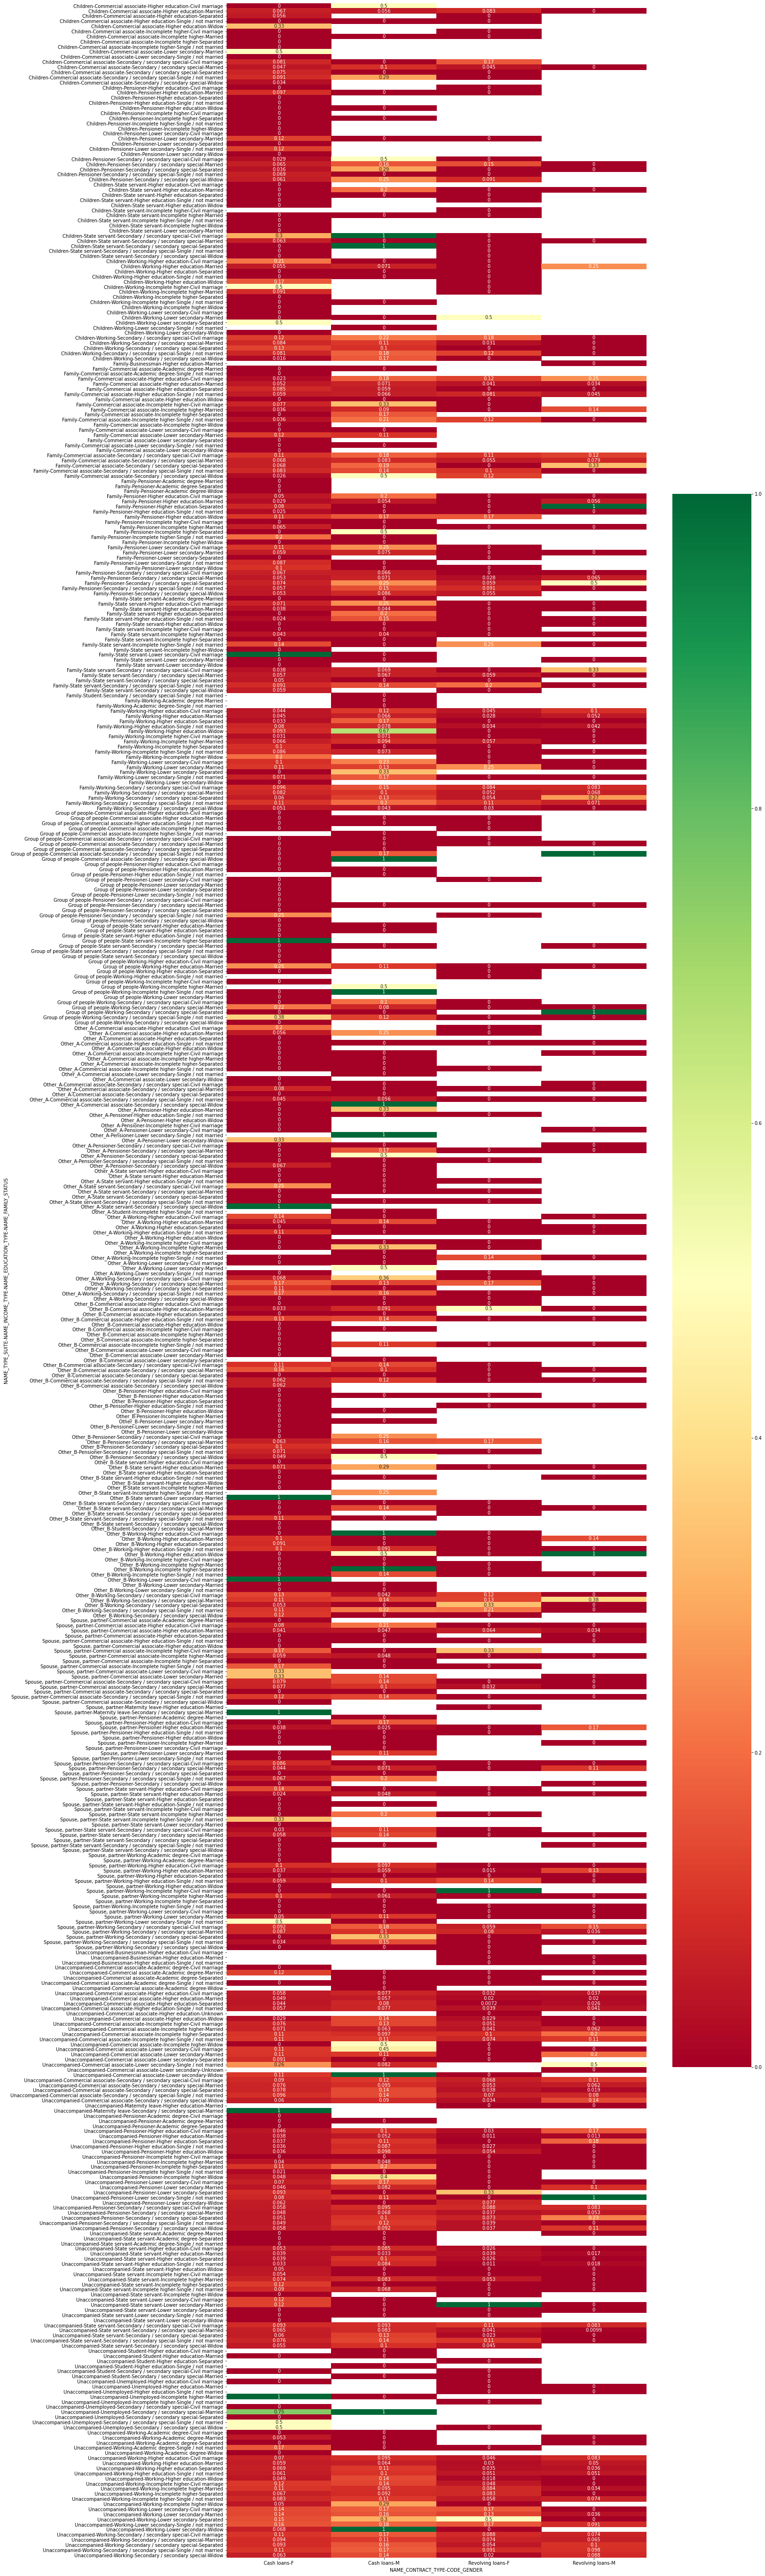

In [218]:
plt.figure(figsize=(20,100))
df = pd.pivot_table(data=app, index=['NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS'], columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER'], values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

#### Conc: 

From the above the data, we can understand many things. Let's speperate it out and dropping useless columns

In [219]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

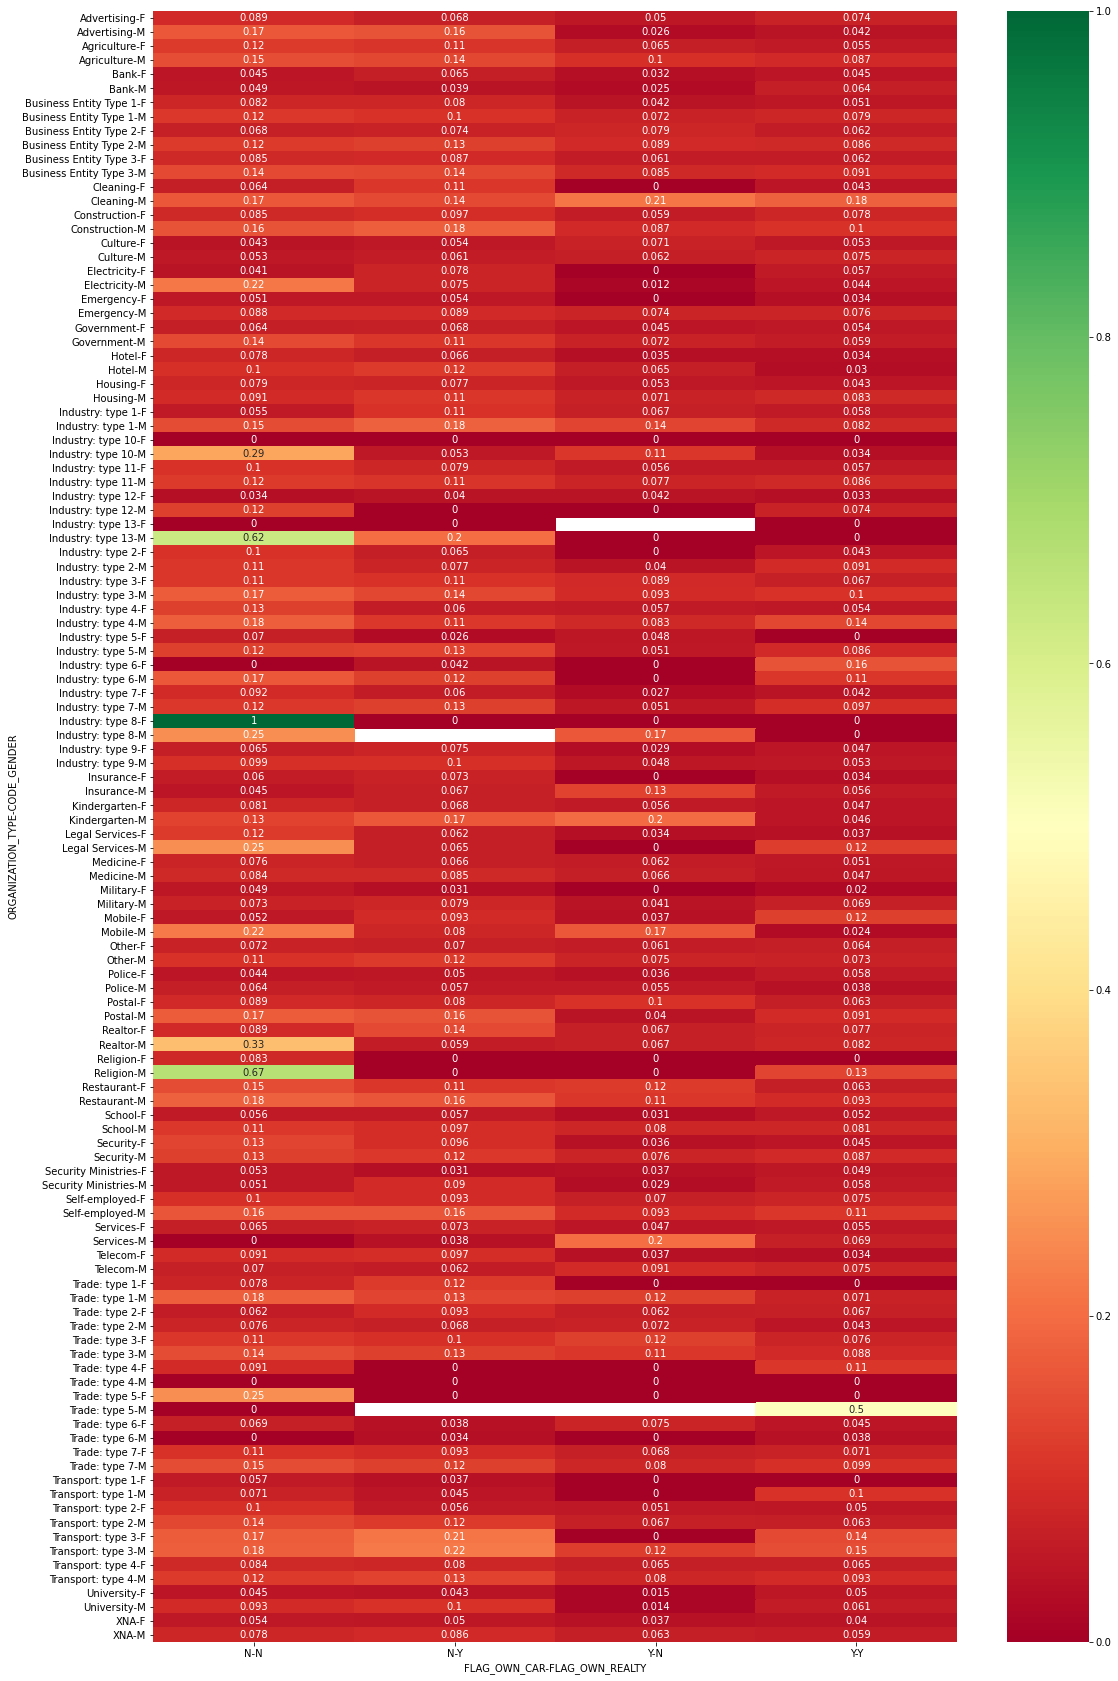

In [220]:
plt.figure(figsize=(18,30))
df = pd.pivot_table(data=app, index=['ORGANIZATION_TYPE', 'CODE_GENDER'], columns=['FLAG_OWN_CAR', 'FLAG_OWN_REALTY'], values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

##### Conc: 
* Female - Organization type (Industry type 8) and if they don't have car or realty (1)
* Male - Organization type is Religion Type and if they don't have car or realty (0.67)
* Male - Organization type is Industry type 13 and if they don't have car or realty (0.62)
like to become defaulters.

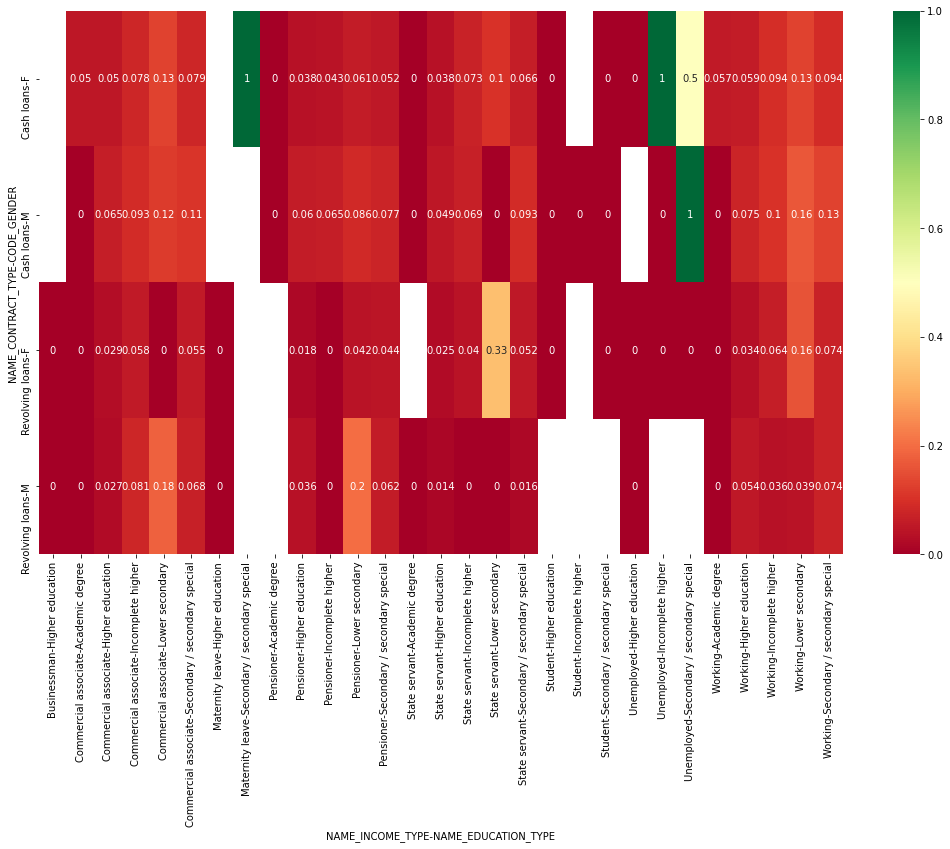

In [221]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=app, index=['NAME_CONTRACT_TYPE', 'CODE_GENDER'], columns=['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE'], values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

##### Defaulters:

* Name contract type - Cash Loans Female and Name income type - Maternity Leave and education type secondary special
* Name contract type - Cash Loans Female and Name income type - Unemployed and education type secondary special
* Name contract type - Cash Loans Male and Name income type Unemployed and education type Incomplete Higher

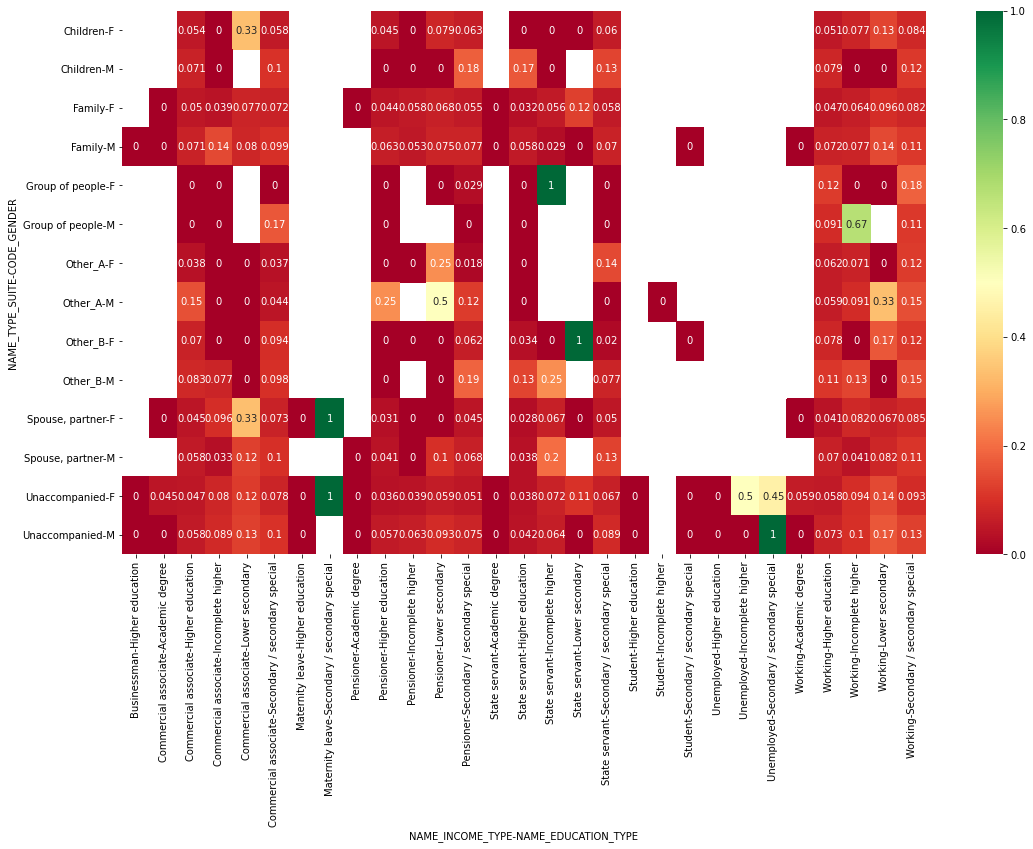

In [222]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=app, index=['NAME_TYPE_SUITE', 'CODE_GENDER'], columns=['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE'], values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

###### Defaulters:
* Female - Name Type Suite is Group of people and if their income type is state servent and education type is Incomplete higher
* Male - Name Type Suite is Group of people and if their income type is working and education type is Incomplete higher (0.67)
* Female - Name Type Suite is Other-B and if their income type is state servent and education type is Lower secondary
* Female - Name Type Suite is Spouse,partner and if their income type is maternity leave and education type is secondary special
* Female - Name Type Suite is Unaccompanied and if their income type is maternity leave and education type is secondary special
* Male - Name Type Suite is Unaccompanied and if their income type is unemployed and education type is secondary/ secondary special

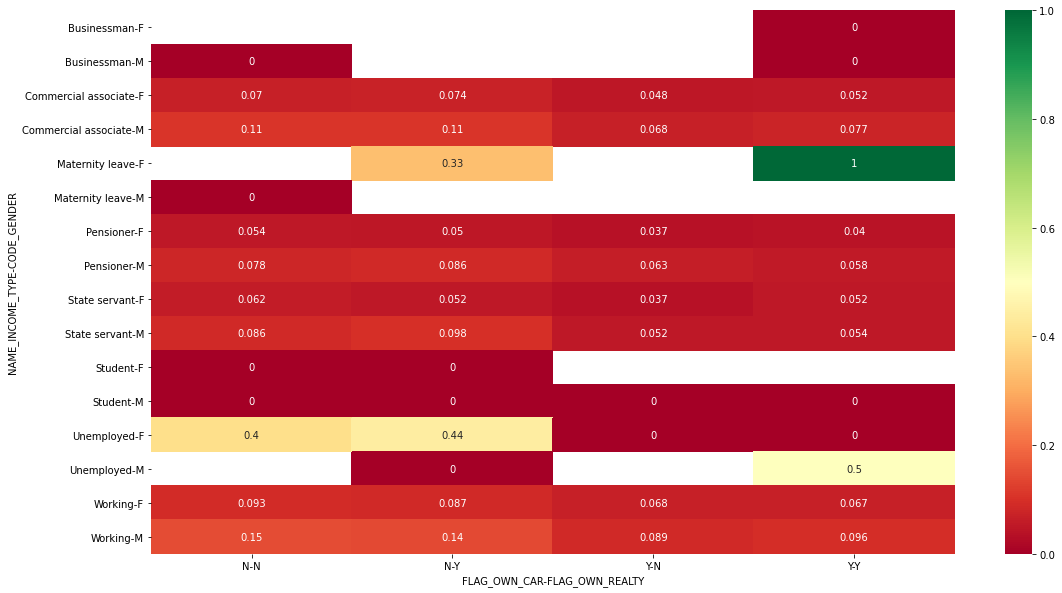

In [223]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=app, index=['NAME_INCOME_TYPE', 'CODE_GENDER'], columns=['FLAG_OWN_CAR', 'FLAG_OWN_REALTY'], values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

###### COnc:

People who have female maternity leave and if they have car and realty, they became a defaulter.

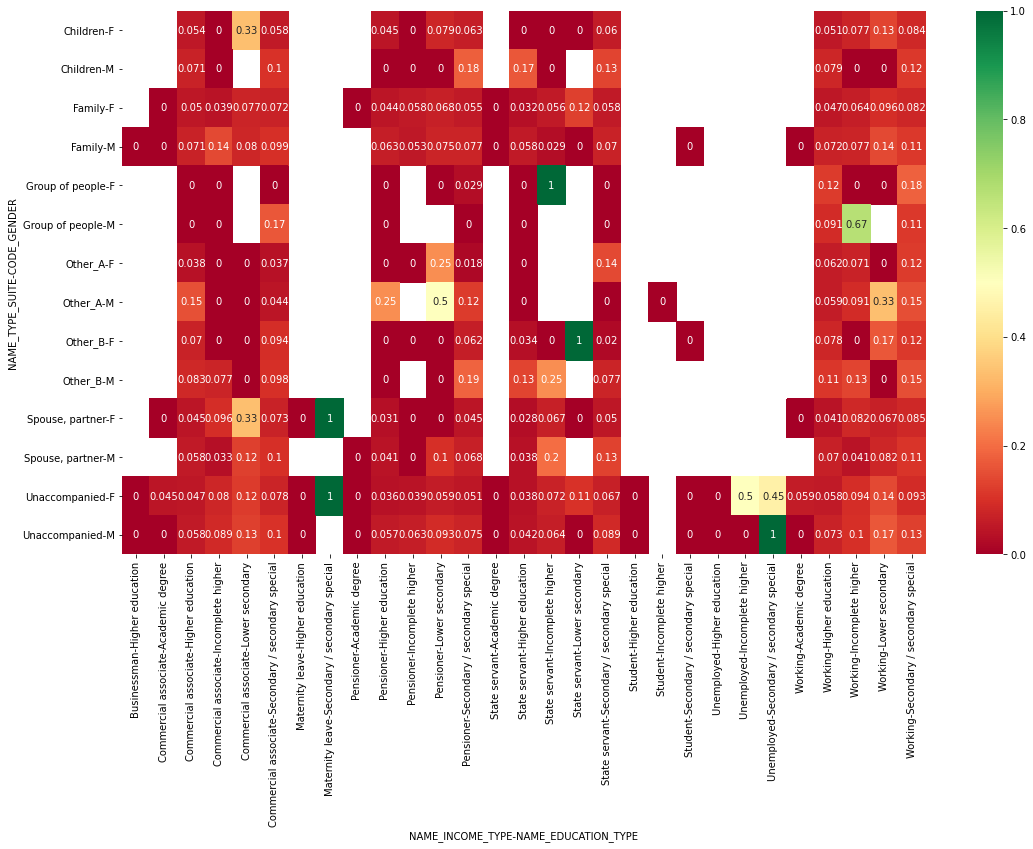

In [224]:
plt.figure(figsize=(18,10))
df = pd.pivot_table(data=app, index=['NAME_TYPE_SUITE', 'CODE_GENDER'], columns=['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE'], values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

##### Conc:

* NAME_INCOME_TYPE - Maternity Leave & NAME_EDUCATION_TYPE - secondary special vs NAME_TYPE_SUITE - Spouse, partner Female
* NAME_INCOME_TYPE - Maternity Leave & NAME_EDUCATION_TYPE - secondary special vs NAME_TYPE_SUITE - Unaccompanied Male
* NAME_INCOME_TYPE - State Servant & NAME_EDUCATION_TYPE - incomplete higher vs NAME_TYPE_SUITE - Other_B,Female
* NAME_INCOME_TYPE - State Servant & NAME_EDUCATION_TYPE - incomplete higher vs NAME_TYPE_SUITE - Group of People,Female
* NAME_INCOME_TYPE - Unemployed & NAME_EDUCATION_TYPE - secondary special vs NAME_TYPE_SUITE - Unaccompanied Male

In [225]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE'],
      dtype='object')

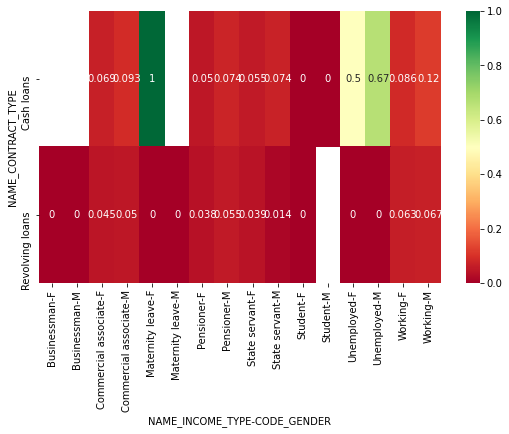

In [226]:
plt.figure(figsize=(9,5))
df = pd.pivot_table(data=app, index=[ 'NAME_CONTRACT_TYPE'], columns=['NAME_INCOME_TYPE', 'CODE_GENDER'], values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

##### Defaulters:

* NAME_CONTRACT_TYPE - Cash Loans & NAME_INCOME_TYPE - Female Maternity Leave
* NAME_CONTRACT_TYPE - Cash Loans & NAME_INCOME_TYPE - Male Unemployed (0.67)

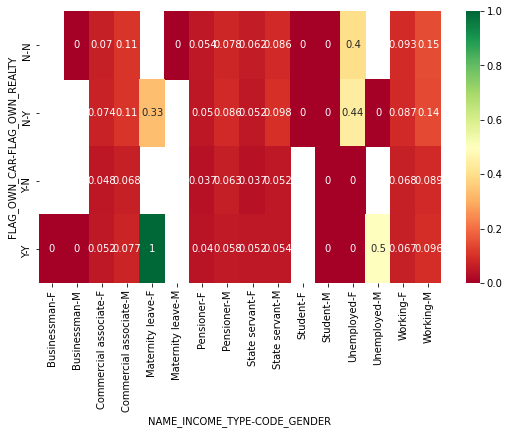

In [227]:
plt.figure(figsize=(9,5))
df = pd.pivot_table(data=app, index=['FLAG_OWN_CAR', 'FLAG_OWN_REALTY'], columns=['NAME_INCOME_TYPE', 'CODE_GENDER'], values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

##### Defaulters:

*  If someone own a car and own realty & NAME_INCOME_TYPE - Female Maternity Leave

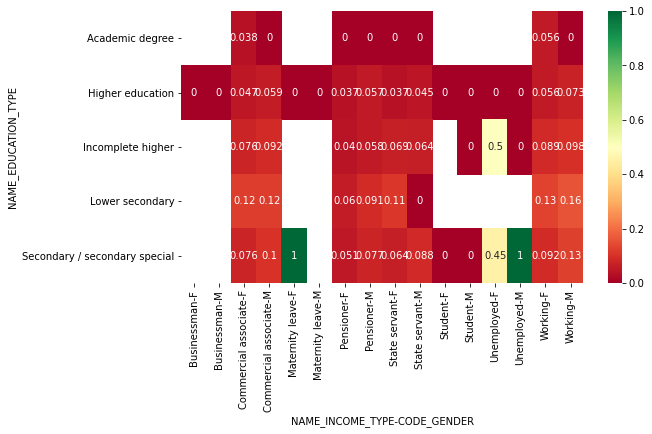

In [228]:
plt.figure(figsize=(9,5))
df = pd.pivot_table(data=app, index=['NAME_EDUCATION_TYPE'], columns=['NAME_INCOME_TYPE', 'CODE_GENDER'], values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

##### Defaulters:

* NAME_EDUCATION_TYPE - Secondary/Secondary Special & NAME_INCOME_TYPE - Female Maternity Leave or Unemployed Male

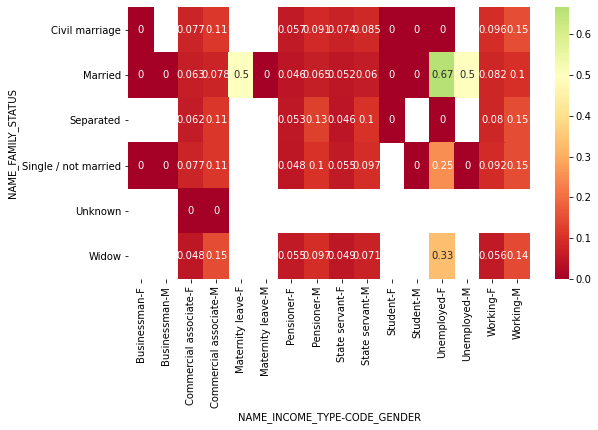

In [229]:
plt.figure(figsize=(9,5))
df = pd.pivot_table(data=app, index=['NAME_FAMILY_STATUS'], columns=['NAME_INCOME_TYPE', 'CODE_GENDER'], values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

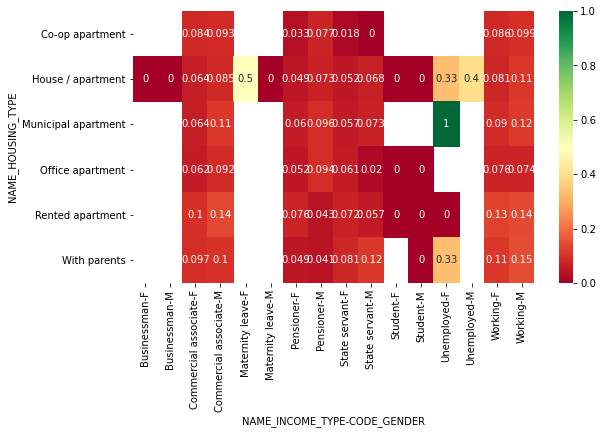

In [230]:
plt.figure(figsize=(9,5))
df = pd.pivot_table(data=app, index=['NAME_HOUSING_TYPE'], columns=['NAME_INCOME_TYPE', 'CODE_GENDER'], values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

##### Defaulters
NAME_HOUSING_TYPE - Municipal apartment & NAME_INCOME_TYPE - Unemployed Female

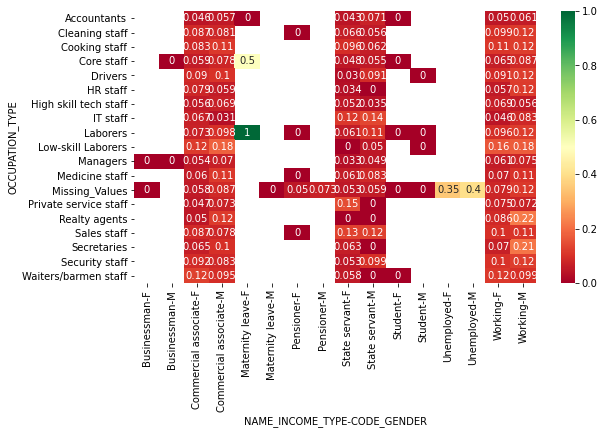

In [231]:
plt.figure(figsize=(9,5))
df = pd.pivot_table(data=app, index=['OCCUPATION_TYPE'], columns=['NAME_INCOME_TYPE', 'CODE_GENDER'], values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

##### Defaulters
* OCCUPATION_TYPE - Laborers & NAME_INCOME_TYPE - Female maternity leave

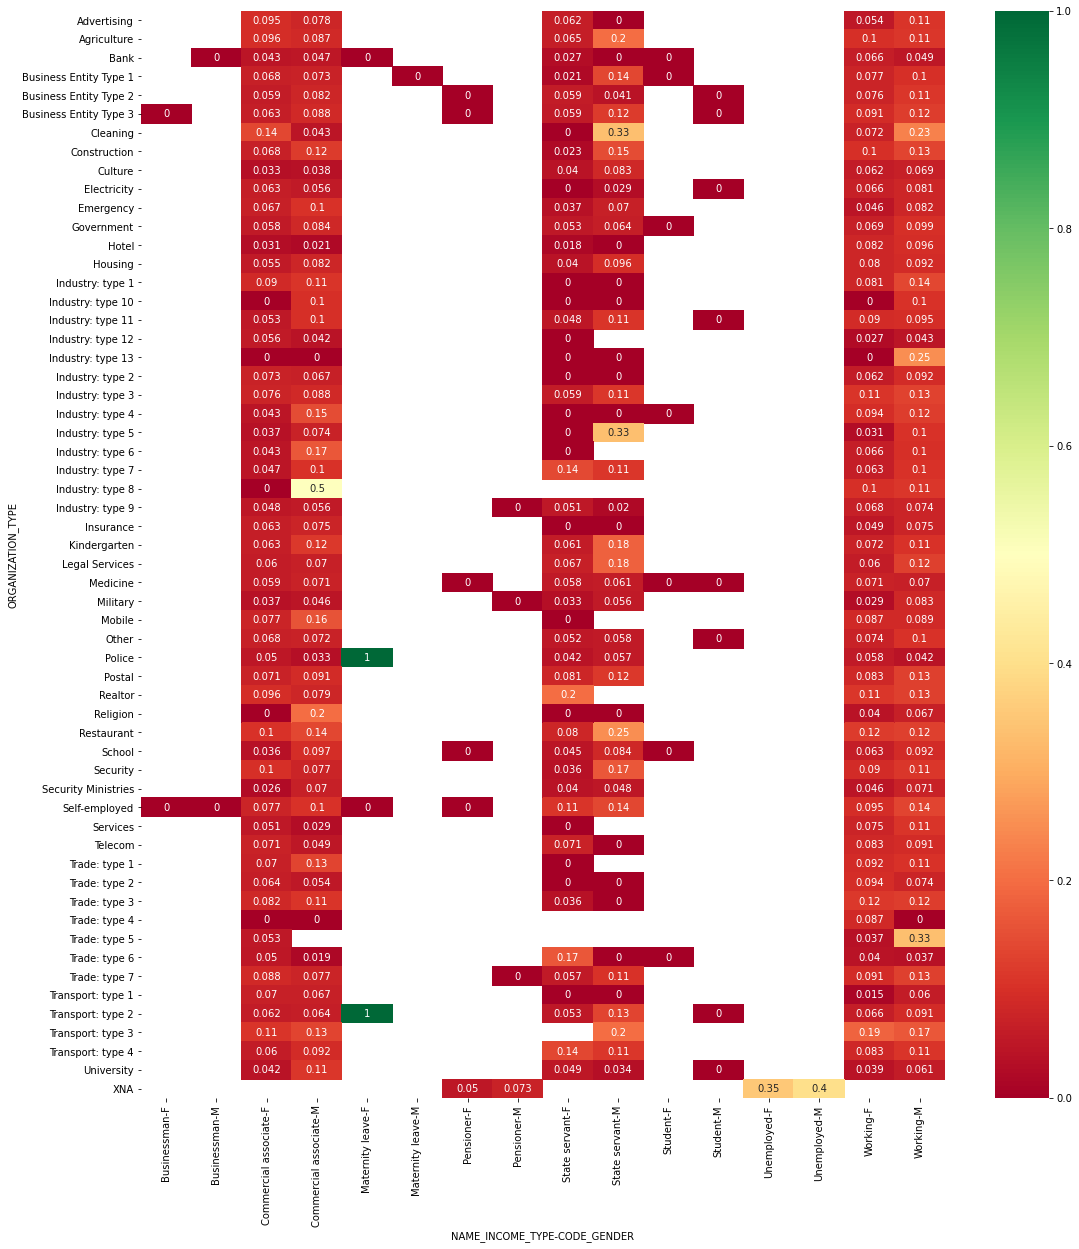

In [232]:
plt.figure(figsize=(18,20))
df = pd.pivot_table(data=app, index=['ORGANIZATION_TYPE'], columns=['NAME_INCOME_TYPE', 'CODE_GENDER'], values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

###### Defaulters:

* ORGANIZATION_TYPE - Police & NAME_INCOME_TYPE - Female maternity leave
* ORGANIZATION_TYPE - Transport type 2 & NAME_INCOME_TYPE - Female: maternity leave

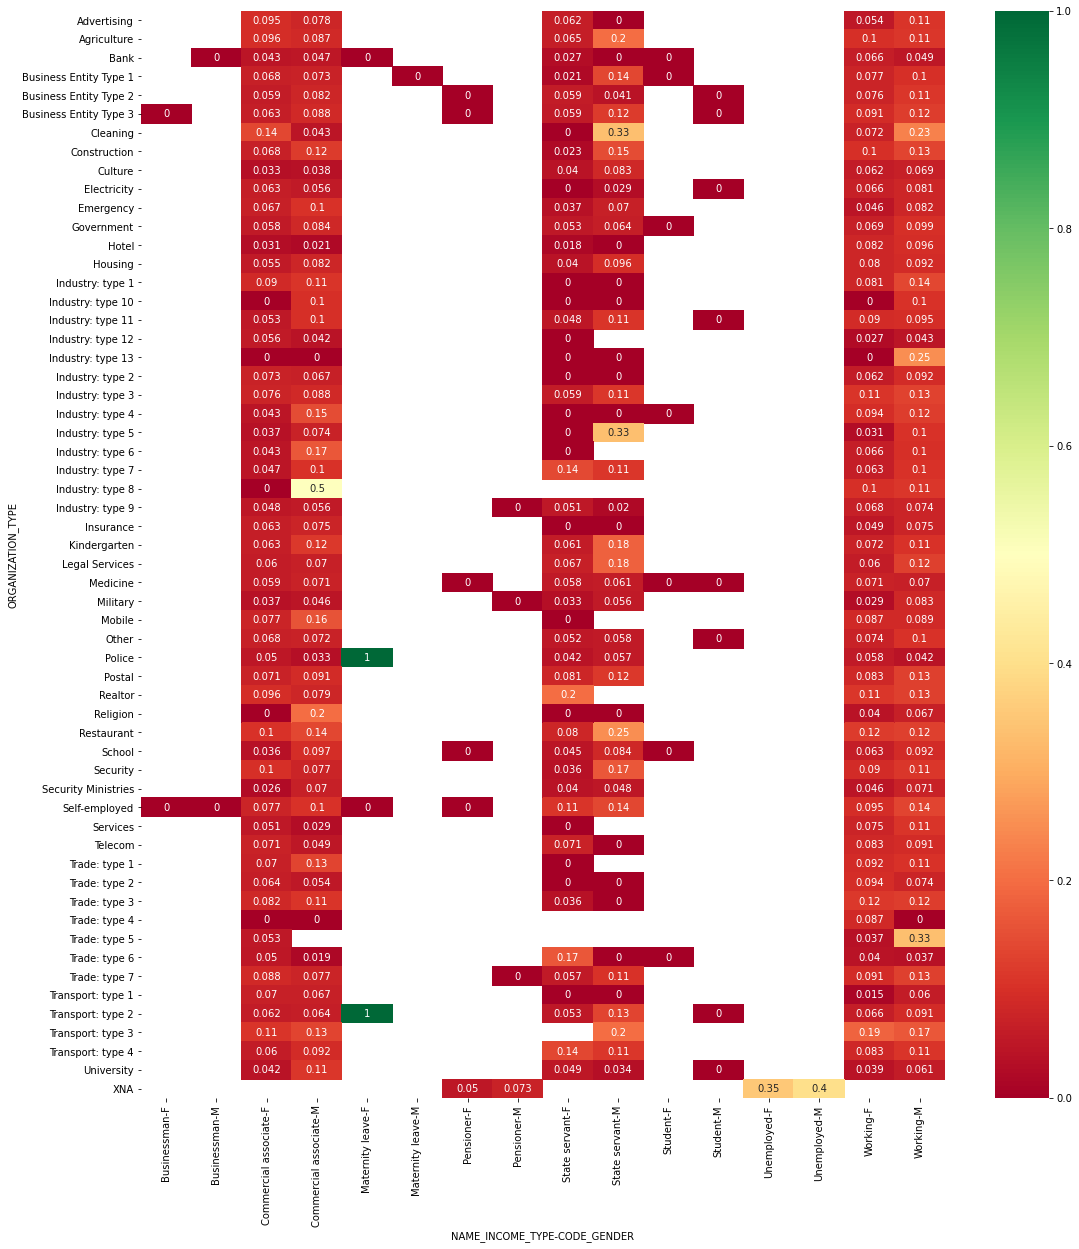

In [233]:
plt.figure(figsize=(18,20))
df = pd.pivot_table(data=app, index=['ORGANIZATION_TYPE'], columns=['NAME_INCOME_TYPE', 'CODE_GENDER'], values="TARGET")
sns.heatmap(df, cmap="RdYlGn", annot=True, center=0.5)
plt.show()

In [234]:
app.dtypes

SK_ID_CURR              int64
TARGET                  int64
NAME_CONTRACT_TYPE     object
CODE_GENDER            object
FLAG_OWN_CAR           object
FLAG_OWN_REALTY        object
NAME_TYPE_SUITE        object
NAME_INCOME_TYPE       object
NAME_EDUCATION_TYPE    object
NAME_FAMILY_STATUS     object
NAME_HOUSING_TYPE      object
OCCUPATION_TYPE        object
ORGANIZATION_TYPE      object
dtype: object

In [235]:
pre_app.dtypes

SK_ID_CURR                     int64
WEEKDAY_APPR_PROCESS_START    object
NAME_CASH_LOAN_PURPOSE        object
NAME_CONTRACT_STATUS          object
CODE_REJECT_REASON            object
NAME_TYPE_SUITE               object
NAME_GOODS_CATEGORY           object
NAME_PRODUCT_TYPE             object
CHANNEL_TYPE                  object
NAME_SELLER_INDUSTRY          object
PRODUCT_COMBINATION           object
dtype: object

### Combining both and Analysing

In [236]:
df = pd.merge(app, pre_app, on ='SK_ID_CURR',how='right')

In [237]:
df.shape

(307511, 23)

In [238]:
app.shape

(307507, 13)

In [239]:
pre_app.shape

(307511, 11)

In [240]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      271877     0.0         Cash loans           F            N   
1      108129     0.0    Revolving loans           F            N   
2      122040     0.0         Cash loans           F            N   
3      176158     0.0         Cash loans           M            Y   
4      202054     0.0         Cash loans           F            N   

  FLAG_OWN_REALTY NAME_TYPE_SUITE_x      NAME_INCOME_TYPE  \
0               Y     Unaccompanied         State servant   
1               N            Family  Commercial associate   
2               Y   Spouse, partner               Working   
3               Y            Family             Pensioner   
4               N     Unaccompanied         State servant   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  ...  \
0              Incomplete higher            Married  ...   
1  Secondary / secondary special     Civil marriage  ...   
2  Secondary / secondary special            Married  ...   
3  Secondary / secondary special            Married  ...   
4  Secondary / secondary special            Married  ...   

  WEEKDAY_APPR_PROCESS_START NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                   SATURDAY                    XAP             Approved   
1                   THURSDAY                    XNA             Approved   
2                    TUESDAY                    XNA             Approved   
3                     MONDAY                    XNA             Approved   
4                   THURSDAY                Repairs              Refused   

  CODE_REJECT_REASON NAME_TYPE_SUITE_y NAME_GOODS_CATEGORY NAME_PRODUCT_TYPE  \
0                XAP    Missing_Values              Mobile               XNA   
1                XAP     Unaccompanied                 XNA            x-sell   
2                XAP   Spouse, partner                 XNA            x-sell   
3                XAP    Missing_Values                 XNA            x-sell   
4                 HC    Missing_Values                 XNA           walk-in   

              CHANNEL_TYPE NAME_SELLER_INDUSTRY       PRODUCT_COMBINATION  
0             Country-wide         Connectivity  POS mobile with interest  
1           Contact center                  XNA          Cash X-Sell: low  
2  Credit and cash offices                  XNA         Cash X-Sell: high  
3  Credit and cash offices                  XNA       Cash X-Sell: middle  
4  Credit and cash offices                  XNA         Cash Street: high  

[5 rows x 23 columns]

In [241]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                        46891
NAME_CONTRACT_TYPE            46891
CODE_GENDER                   46891
FLAG_OWN_CAR                  46891
FLAG_OWN_REALTY               46891
NAME_TYPE_SUITE_x             46891
NAME_INCOME_TYPE              46891
NAME_EDUCATION_TYPE           46891
NAME_FAMILY_STATUS            46891
NAME_HOUSING_TYPE             46891
OCCUPATION_TYPE               46891
ORGANIZATION_TYPE             46891
WEEKDAY_APPR_PROCESS_START        0
NAME_CASH_LOAN_PURPOSE            0
NAME_CONTRACT_STATUS              0
CODE_REJECT_REASON                0
NAME_TYPE_SUITE_y                 0
NAME_GOODS_CATEGORY               0
NAME_PRODUCT_TYPE                 0
CHANNEL_TYPE                      0
NAME_SELLER_INDUSTRY              0
PRODUCT_COMBINATION               0
dtype: int64

In [242]:
df = df[~df.NAME_CONTRACT_TYPE.isnull()].copy()
df.NAME_CONTRACT_TYPE.isnull().sum()

0

In [243]:
df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE_x             0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
ORGANIZATION_TYPE             0
WEEKDAY_APPR_PROCESS_START    0
NAME_CASH_LOAN_PURPOSE        0
NAME_CONTRACT_STATUS          0
CODE_REJECT_REASON            0
NAME_TYPE_SUITE_y             0
NAME_GOODS_CATEGORY           0
NAME_PRODUCT_TYPE             0
CHANNEL_TYPE                  0
NAME_SELLER_INDUSTRY          0
PRODUCT_COMBINATION           0
dtype: int64

In [244]:
df.dtypes

SK_ID_CURR                      int64
TARGET                        float64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
NAME_TYPE_SUITE_x              object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
OCCUPATION_TYPE                object
ORGANIZATION_TYPE              object
WEEKDAY_APPR_PROCESS_START     object
NAME_CASH_LOAN_PURPOSE         object
NAME_CONTRACT_STATUS           object
CODE_REJECT_REASON             object
NAME_TYPE_SUITE_y              object
NAME_GOODS_CATEGORY            object
NAME_PRODUCT_TYPE              object
CHANNEL_TYPE                   object
NAME_SELLER_INDUSTRY           object
PRODUCT_COMBINATION            object
dtype: object

##### High correlation from application_data.csv

**Defaulter with high correlation:**

 * Those who didn't submit documents 4,10 and 12 become defaulters.
 * Female - Organization type (Industry type 8) and if they don't have car or realty.
 * Name contract type - Cash Loans Female and Name income type - Maternity Leave and education type secondary special.
 * Name contract type - Cash Loans Female and Name income type - Unemployed and education type secondary special.
 * Name contract type - Cash Loans Male and Name income type Unemployed and education type Incomplete Higher.
 * Female - Name Type Suite is Group of people and if their income type is state servant and education type is Incomplete higher
 * Female - Name Type Suite is Other-B and if their income type is state servent and education type is Lower secondary
 * Female - Name Type Suite is Spouse,partner and if their income type is maternity leave and education type is secondary special
 * Female - Name Type Suite is Unaccompanied and if their income type is maternity leave and education type is secondary special
 * Male - Name Type Suite is Unaccompanied and if their income type is unemployed and education type is secondary/ secondary special
 * NAME_CONTRACT_TYPE - Cash Loans & NAME_INCOME_TYPE - Female Maternity Leave
 * If someone own a car and own realty & NAME_INCOME_TYPE - Female Maternity Leave
 * NAME_EDUCATION_TYPE - Secondary/Secondary Special & NAME_INCOME_TYPE - Female Maternity Leave or Unemployed Male
 * NAME_HOUSING_TYPE - Municipal apartment & NAME_INCOME_TYPE - Unemployed Female
 * OCCUPATION_TYPE - Laborers & NAME_INCOME_TYPE - Female maternity leave
 * ORGANIZATION_TYPE - Police & NAME_INCOME_TYPE - Female maternity leave
 * ORGANIZATION_TYPE - Transport type 2 & NAME_INCOME_TYPE - Female: maternity

##### High correlation from previous_application.csv

**Defaulter with high correlation:**

* If the client's application is cancelled while applying for buying a garage.
* Cash Loan purpose is Hobby and if it got rejected previous time as 'SCO'.
* Cash Loan purpose as Wedding/Gift/Holiday and if it got rejected previous time as 'VERIF'.
* Cash Loan Purpose is Building a house and Type Suite is children.
* Cash loan purpose is hobby and type suite is Family.
* Cash loan purpose is Gasification/Water Supply and type suite is Spouse,partner.
* Cash Loan Purpose is car repairs and product type x-sell in the previous application.
* Cash Loan Purpose is buying a used car and if the seller industry is furniture.
* Cash Loan Purpose is journey and if the seller industry is consumer electronics.
* Name type suite is Other_A and if the goods category is tourism.
* Name type suite is spouse, partner and if the goods category is cash additional services.
* Goods category additional service or Fitness and if channel type category is regional/Local.
* Goods category is fitness and if the seller industry category is XNA.
* Goods category is gardening and if the seller industry category is clothing.
* Goods category is homewares and if the seller industry category is tourism.
* Goods category is sport and leisure or tourism and if the product combination category is POS others without internet.
* Channel type is car dealer and if the product combination category is cash x-sell:low.
* Seller industry is auto technology and if the product combination category is cash X-sell: high.